### Obtaining Timeseries Datasets:
    Datasets from real-world scenarios are important for building and testing machine learning models. We may just want to have some data to experiment with an algorithm. We may also want to evaluate our model by setting up a benchmark or determining its weaknesses using different sets of data. Sometimes, we may also want to create synthetic datasets, where we can test your algorithms under controlled conditions by adding noise, correlations, or redundant information to the data.
    
    For extracting timeseries data from different sources, we can use:
                           - pandas_datareader
                           - requests library (to fetch data using the remote server’s APIs)
                           - sythentic datasets generation under controlled conditions

In [1]:
#Installing the libraries
!pip install pandas_datareader

In [2]:
!pip install requests

#### pandas_datareader
    pandas_datareader pulls the data you want from the web in real time and assembles it into a pandas DataFrame. It only supports reading from a limited number of sources, mostly related to financial and economic time series. The sources from which pandas_datareader retrieve the data from are: Yahoo Finance for financial market data, World Bank for global development data, and St. Louis Fed (FRED) for economic data, Tiingo, The Investors Exchange(IEX), Alpha Vantage, Econdb, Enigma, Quandl
                 
                 Ref:   https://pandas-datareader.readthedocs.io/en/latest/remote_data.html
                 
    It should be noted, that various sources support different kinds of data, so not all sources implement the same methods and the data elements returned might also differ. The call to DataReader() requires the first argument to specify the ticker and the second argument the data source.

In [24]:
#pandas_reader - Retreiving GDP data whose symbol tag is "GDP" from FRED server

import pandas_datareader.data as pdr
import datetime

start_time = datetime.datetime(2020, 1, 1)
end_time = datetime.datetime(2023, 3, 13)
gdp_df = pdr.DataReader('GDP', data_source='fred', start=start_time, end=end_time)
gdp_df.head(20)

,GDP
DATE,
2020-01-01,21538.032
2020-04-01,19636.731
2020-07-01,21362.428
2020-10-01,21704.706
2021-01-01,22313.850
2021-04-01,23046.934
2021-07-01,23550.420
2021-10-01,24349.121
2022-01-01,24740.480


In [26]:
gdp_df.loc['2022-10-01']

GDP    26144.956
Name: 2022-10-01 00:00:00, dtype: float64

In [33]:
# Passing Multiple series as a list
symbols = ['CPIAUCSL', 'CPILFESL']
inflation = pdr.DataReader(symbols, 'fred',  "2010-01-01", "2022-12-31")
inflation.head(20)
#CPIAUCSL - Consumer Price Index for All Urban Consumers
#CPILFESL - All Items Less Food and Energy in U.S. City Average

,CPIAUCSL,CPILFESL
DATE,,
2010-01-01,217.488,220.633
2010-02-01,217.281,220.731
2010-03-01,217.353,220.783
2010-04-01,217.403,220.822
2010-05-01,217.290,220.962
2010-06-01,217.199,221.194
2010-07-01,217.605,221.363
2010-08-01,217.923,221.509
2010-09-01,218.275,221.711


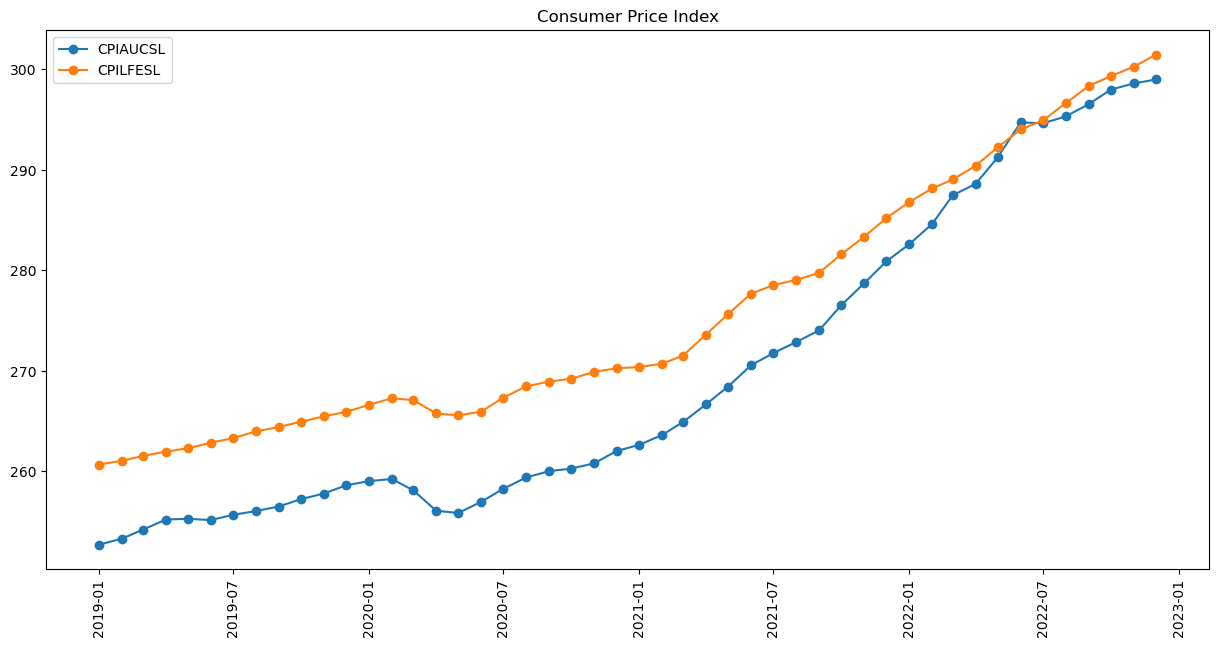

In [34]:
#Plotting the inflation timerseries evalaution
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

figure = plt.figure(figsize=(15, 7))
plt.plot(inflation.loc["2019":], 'o-')
plt.xticks(rotation=90)
plt.legend(inflation.columns)
plt.title("Consumer Price Index")
plt.show()

In [ ]:
# #Obtaining data from yahoo - extraction from yahoo is having some issues from the library side.so this is throwing the error right now
# import matplotlib.pyplot as plt
# import matplotlib.ticker as ticker
 
# companies = ['AAPL', 'MSFT', 'GE']
# shares_multiple_df = pdr.DataReader(companies, 'yahoo', start='2021-01-01', end='2021-12-31')
# print(shares_multiple_df)
 
# def plot_timeseries_df(df, attrib, ticker_loc=1, title='Timeseries', legend=''):
#     "General routine for plotting time series data"
#     fig = plt.figure(figsize=(15,7))
#     plt.plot(df[attrib], 'o-')
#     _ = plt.xticks(rotation=90)
#     plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(ticker_loc))
#     plt.title(title)
#     plt.gca().legend(legend)
#     plt.show()
 
# plot_timeseries_df(shares_multiple_df.loc["2021-04-01":"2021-06-30"], "Close",
#                    ticker_loc=3, title="Close price", legend=companies)

    	Obtaining data from world bank
        -------------------------------
        Obtaining data from World Bank is also similar, but we have to understand that the data from World Bank is more complicated. Usually, a data series, such as population, is presented as a time series and also has the countries dimension. Therefore, we need to specify more parameters to obtain the data.

    Using pandas_datareader, we have a specific set of APIs for the World Bank. The symbol for an indicator can be looked up from World Bank Open Data or searched using the following code. 
    Here the id column is the symbol for the time series. We can read data for specific countries by specifying the ISO-3166-1 country code. But World Bank also contains non-country aggregates (e.g., South Asia), so while pandas_datareader allows us to use the string “all” for all countries, usually we do not want to use it. 

In [3]:
#extracting data from world bank using pandas_datareader
from pandas_datareader import wb

matches = wb.search('total.*population') #regex expression - .* above means string of any length
print(type(matches))
print(matches.columns)
print(matches[:5])
print(matches[['id', 'name']])

<class 'pandas.core.frame.DataFrame'>
Index(['id', 'name', 'unit', 'source', 'sourceNote', 'sourceOrganization',
       'topics'],
      dtype='object')
                              id  \
24    1.1_ACCESS.ELECTRICITY.TOT   
161           2.1_ACCESS.CFT.TOT   
2086             CC.AVPB.PTPI.AI   
2087             CC.AVPB.PTPI.AR   
2088             CC.AVPB.PTPI.DI   

                                                   name unit  \
24        Access to electricity (% of total population)        
161   Access to Clean Fuels and Technologies for coo...        
2086  Additional people below $1.90 as % of total po...        
2087  Additional people below $1.90 as % of total po...        
2088  Additional people below $1.90 as % of total po...        

                                             source  \
24                       Sustainable Energy for All   
161                      Sustainable Energy for All   
2086  Country Climate and Development Report (CCDR)   
2087  Country Climate and

In [40]:
#Below is how we can get a list of all countries and aggregates from the World Bank
import pandas_datareader.wb as wb
countries = wb.get_countries()
countries

,iso3c,iso2c,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
0,ABW,AW,Aruba,Latin America & Caribbean,,High income,Not classified,Oranjestad,-70.0167,12.5167
1,AFE,ZH,Africa Eastern and Southern,Aggregates,,Aggregates,Aggregates,,NaN,NaN
2,AFG,AF,Afghanistan,South Asia,South Asia,Low income,IDA,Kabul,69.1761,34.5228
3,AFR,A9,Africa,Aggregates,,Aggregates,Aggregates,,NaN,NaN
4,AFW,ZI,Africa Western and Central,Aggregates,,Aggregates,Aggregates,,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
294,XZN,A5,Sub-Saharan Africa excluding South Africa and ...,Aggregates,,Aggregates,Aggregates,,NaN,NaN
295,YEM,YE,"Yemen, Rep.",Middle East & North Africa,Middle East & North Africa (excluding high inc...,Low income,IDA,Sana'a,44.2075,15.3520
296,ZAF,ZA,South Africa,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Upper middle income,IBRD,Pretoria,28.1871,-25.7460
297,ZMB,ZM,Zambia,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Low income,IDA,Lusaka,28.2937,-15.3982


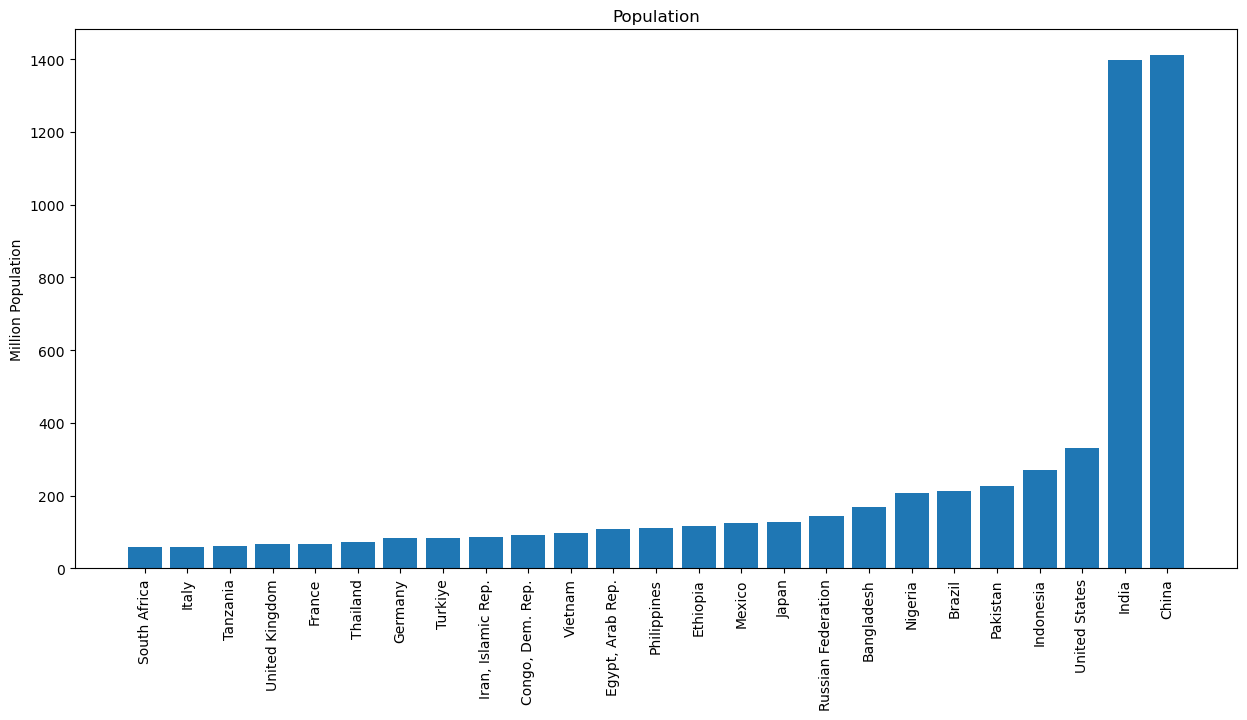

In [53]:
#Below is how we can get the population of all countries in 2020 and show the top 25 countries in a bar chart
#Certainly, we can also get the population data across years by specifying a different start and end year

from pandas_datareader import wb
import warnings
warnings.filterwarnings('ignore', "Non-standard ISO country codes")

countries = wb.get_countries()
# Get a list of 2-letter country code excluding aggregates
countries = list(countries[countries.region!='Aggregates']['iso2c'])

# Read countries' total population data (SP.POP.TOTL) in year 2020
population_df = wb.download(country=countries, indicator="SP.POP.TOTL", start=2020, end=2020)

# Sort by population, then take top 25 countries, and make the index (i.e., countries) as a column
population_df = (population_df.dropna()
                 .sort_values("SP.POP.TOTL")
                 .iloc[-25:]
                 .reset_index())

# Plot the population, in millions
figure = plt.figure(figsize=(15, 7))
plt.bar(population_df['country'], population_df["SP.POP.TOTL"]/1e6)
plt.xticks(rotation=90)
plt.ylabel("Million Population")
plt.title("Population")
plt.show()

#### Requests library: Fetching Data Using Web APIs
    Instead of using the pandas_datareader library, sometimes you have the option to fetch data directly from a web data server by calling its web APIs without any authentication needed. It can be done in Python using the standard library urllib.requests, or you may also use the requests library for an easier interface.
        
        https://documents.worldbank.org/en/publication/documents-reports/api
        
        World Bank is an example where web APIs are freely available, so we can easily read data in different formats, such as JSON, XML, or plain text. The page on the World Bank data repository’s API describes various APIs and their respective parameters. To repeat what we did in the previous example without using pandas_datareader, we first construct a URL to read a list of all countries so we can find the country code that is not an aggregate. Then, we can construct a query URL with the following arguments:
            country argument with value = all
            indicator argument with value = SP.POP.TOTL
            date argument with value = 2020
            format argument with value = json
            
        Of course, we can experiment with different indicators. By default, the World Bank returns 50 items on a page, and we need to query for one page after another to exhaust the data. We can enlarge the page size to get all data in one shot. Below is how we get the list of countries in JSON format and collect the country codes
        

In [6]:
#Requests Library
import requests

# Create query URL for list of countries, by default only 50 entries returned per page
url = "http://api.worldbank.org/v2/country/all?format=json&per_page=500"
response = requests.get(url)
# Expects HTTP status code 200 for correct query
print(response.status_code)
header, data = response.json()
print(header)
print(data[1])

# Collect a list of 3-letter country code excluding aggregates
countries = [item['id'] for item in data if item['region']['value']!='Aggregate']
print(countries)

200
{'page': 1, 'pages': 1, 'per_page': '500', 'total': 299}
{'id': 'AFE', 'iso2Code': 'ZH', 'name': 'Africa Eastern and Southern', 'region': {'id': 'NA', 'iso2code': 'NA', 'value': 'Aggregates'}, 'adminregion': {'id': '', 'iso2code': '', 'value': ''}, 'incomeLevel': {'id': 'NA', 'iso2code': 'NA', 'value': 'Aggregates'}, 'lendingType': {'id': '', 'iso2code': '', 'value': 'Aggregates'}, 'capitalCity': '', 'longitude': '', 'latitude': ''}
['ABW', 'AFE', 'AFG', 'AFR', 'AFW', 'AGO', 'ALB', 'AND', 'ARB', 'ARE', 'ARG', 'ARM', 'ASM', 'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEA', 'BEC', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BHI', 'BHR', 'BHS', 'BIH', 'BLA', 'BLR', 'BLZ', 'BMN', 'BMU', 'BOL', 'BRA', 'BRB', 'BRN', 'BSS', 'BTN', 'BWA', 'CAA', 'CAF', 'CAN', 'CEA', 'CEB', 'CEU', 'CHE', 'CHI', 'CHL', 'CHN', 'CIV', 'CLA', 'CME', 'CMR', 'COD', 'COG', 'COL', 'COM', 'CPV', 'CRI', 'CSA', 'CSS', 'CUB', 'CUW', 'CYM', 'CYP', 'CZE', 'DEA', 'DEC', 'DEU', 'DFS', 'DJI', 'DLA', 'DMA', 'DMN', 'DNF', 'DNK', 'DNS', 'DOM'

In [8]:
#Requests Library with indicator 'SP.POP.TOTL'
import requests

params = {'country': 'all',
        'indicator': 'SP.POP.TOTL',
        'date': '2020:2020',
        'format': 'json',
        'page': 500
        }
url_query ="http://api.worldbank.org/v2/country/{country}/indicator/{indicator}?date={date}&format={format}&per_page={page}"
url = url_query.format(**params)

response = requests.get(url)
print(response.status_code)

header, population_data = response.json()
print(header)
print(population_data[:5])

200
{'page': 1, 'pages': 1, 'per_page': 500, 'total': 266, 'sourceid': '2', 'sourcename': 'World Development Indicators', 'lastupdated': '2023-03-30'}
[{'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'}, 'country': {'id': 'ZH', 'value': 'Africa Eastern and Southern'}, 'countryiso3code': 'AFE', 'date': '2020', 'value': 685112705, 'unit': '', 'obs_status': '', 'decimal': 0}, {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'}, 'country': {'id': 'ZI', 'value': 'Africa Western and Central'}, 'countryiso3code': 'AFW', 'date': '2020', 'value': 466189102, 'unit': '', 'obs_status': '', 'decimal': 0}, {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'}, 'country': {'id': '1A', 'value': 'Arab World'}, 'countryiso3code': 'ARB', 'date': '2020', 'value': 449228296, 'unit': '', 'obs_status': '', 'decimal': 0}, {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'}, 'country': {'id': 'S3', 'value': 'Caribbean small states'}, 'countryiso3code': 'CS

#### Note:
    We can check the World Bank API documentation for details on how to construct the URL. For example, the date syntax of 2020:2021 would mean the start and end years, and the extra parameter page=3 will give you the third page in a multi-page result. With the data fetched, we can filter for only those non-aggregate countries, make it into a pandas DataFrame for sorting, and then plot the bar chart

[{'country': 'Africa Eastern and Southern', 'population': 685112705}, {'country': 'Africa Western and Central', 'population': 466189102}]
                       country  population
0  Africa Eastern and Southern   685112705
1   Africa Western and Central   466189102


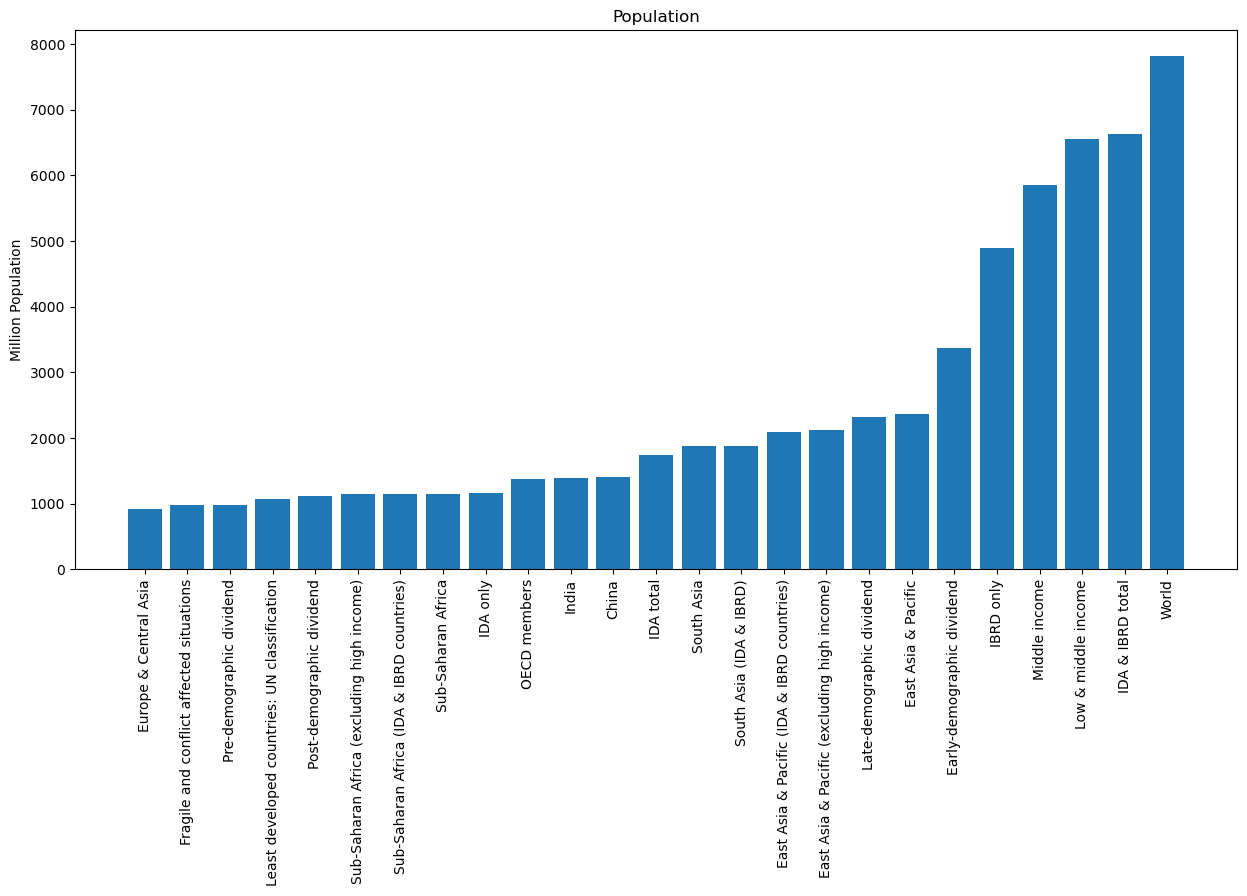

In [12]:
# Filter for countries, not aggregates
import pandas as pd
import matplotlib.pyplot as plt

population = []
for item in population_data:
    if item["countryiso3code"] in countries:
        name = item["country"]["value"]
        population.append({"country":name, "population": item["value"]})

print(population[:2])

# Create DataFrame for sorting and filtering
population = pd.DataFrame.from_dict(population)
print(population.head(2))
population = population.dropna().sort_values("population").iloc[-25:]

# Plot bar chart
fig = plt.figure(figsize=(15,7))
plt.bar(population["country"], population["population"]/1e6)
plt.xticks(rotation=90)
plt.ylabel("Million Population")
plt.title("Population")
plt.show()

### Creating Synthetic Data Using NumPy
    Sometimes, we may not want to use real-world data for our project because we need something specific that may not happen in reality. One particular example is to test out a model with ideal time-series data. In this section, we will see how we can create synthetic autoregressive (AR) time-series data.

    The numpy.random library can be used to create random samples from different distributions. The randn() method generates data from a standard normal distribution with zero mean and unit variance.
    
    In the AR(n) model of order n, the value xt at time step t depends upon the values at the previous n time steps(markov process). That is,
    
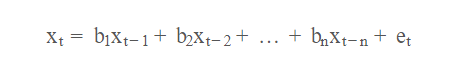

     with model parameters bi as coefficients to different lags of xt, and the error term et is expected to follow normal distribution.

    Understanding the formula, we can generate an AR(3) time series in the example below. We first use randn() to generate the first 3 values of the series and then iteratively apply the above formula to generate the next data point. Then, an error term is added using the randn() function again, subject to the predefined noise_level


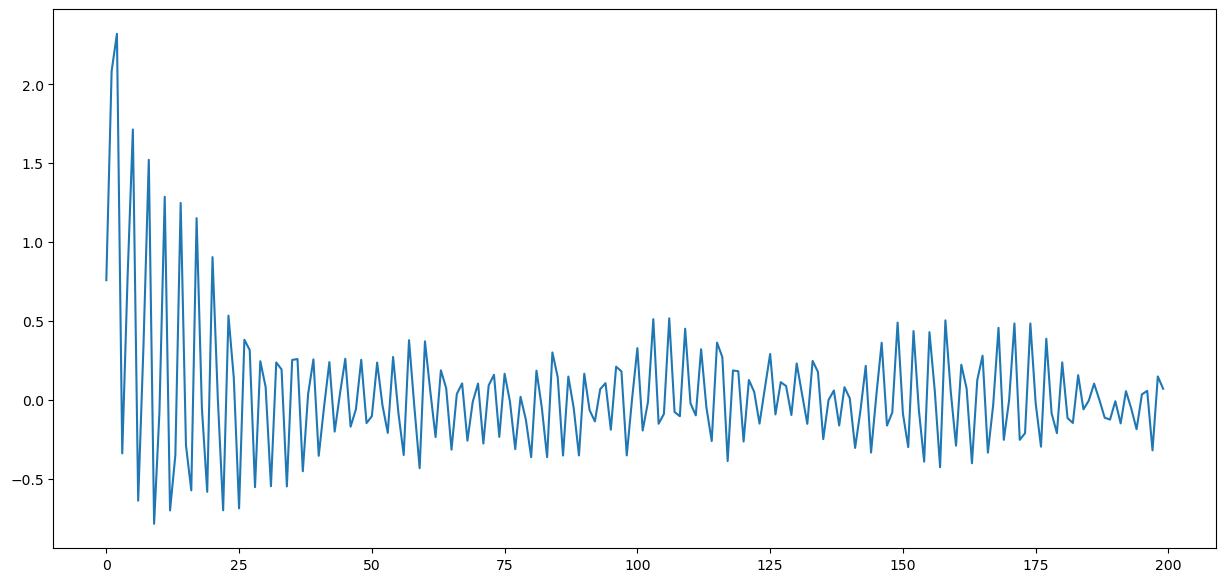

In [73]:
#Synthetic time series generation - autoregressive model of order 3
import numpy as np

#defining parameters
ar_n = 3                     # Order of the AR(n) data
ar_coeff = [0.7, -0.3, -0.1] # Coefficients b_3, b_2, b_1
noise_level = 0.1            # Noise added to the AR(n) data
length = 200                 # Number of data points to generate

# Random initial values
ar_data = list(np.random.randn(3))

# Generate the rest of the values
for i in range(length - ar_n):
    next_xt = (np.array(ar_coeff) @ np.array(ar_data[-3:])) + np.random.randn() * noise_level #@ represents dot product - we can also matmul or dot
    ar_data.append(next_xt)
    
#plot the timeseries
figure = plt.figure(figsize=(15, 7))
plt.plot(ar_data)
plt.show()

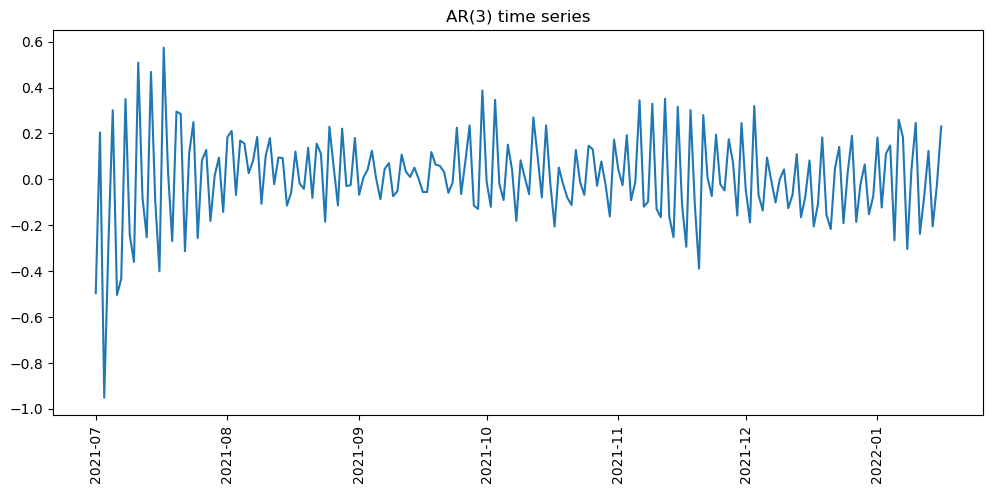

In [15]:
#Generating Synthetic data
#But we can further add the time axis by first converting the data into a pandas DataFrame and then adding the time as an index
#Using similar techniques, we can generate pure random noise (i.e., AR(0) series),
#ARIMA time series (i.e., with coefficients to error terms), or Brownian motion time series (i.e., running sum of random noise) as well.
import numpy as np
import pandas as pd

ar_n = 3
ar_coefs = [0.7, -0.3, -0.1]
error = 0.1
total = 200
ar_data = list(np.random.randn(3))

for i in range(total - ar_n):
    next_val = np.matmul(np.array(ar_coefs), ar_data[-3:]) + np.random.randn() * error
    ar_data.append(next_val)
    
synthetic = pd.DataFrame({"ar_data": ar_data})
synthetic.index = pd.date_range(start="2021-07-01", periods=len(ar_data), freq="D")

# Plot the time series
fig = plt.figure(figsize=(12,5))
plt.plot(synthetic.index, synthetic)
plt.xticks(rotation=90)
plt.title("AR(3) time series")
plt.show()

### Web Crawling
    In the old days, it was a tedious job to collect data, and it was sometimes very expensive. Machine learning projects cannot live without data. Luckily, we have a lot of data on the web at our disposal nowadays. We can copy data from the web to create our dataset. We can manually download files and save them to the disk. But we can do it more efficiently by automating the data harvesting. There are several tools in Python that can help the automation.
                        
                        - requests library to read online data using HTTP(also using lxml and beautifulsoup)
                        - read tables on web pages using pandas
                        - use Selenium to emulate browser operations to read dynamic content
                        - scrapy library
      
#### Using the requests Library:
    
        When we talk about writing a Python program to read from the web, it is inevitable that we can’t avoid the requests library. You need to install it as well as BeautifulSoup and lxml. 
        
        It provides you with an interface that allows you to interact with the web easily.The very simple use case would be to read a web page from a URL using requests library.
        If you’re familiar with HTTP, you will probably know that a status code of 200 means the request is successfully fulfilled. Then we can read the response object of our request. We can also read the textual response and get the HTML of the web page. Should it be a CSV or some other textual data, we can get them in the text attribute of the response object.

In [2]:
!pip install requests beautifulsoup4 lxml

200
----------------------------------------
{'Content-Type': 'text/html; charset=utf-8', 'X-DNS-Prefetch-Control': 'off', 'X-Frame-Options': 'SAMEORIGIN', 'X-Download-Options': 'noopen', 'X-Content-Type-Options': 'nosniff', 'X-XSS-Protection': '1; mode=block', 'webcakes-app-name': 'daybreak-today', 'webcakes-app-version': '1.0.0-3b5af0a7b8', 'webcakes-region': 'sjc04', 'ETag': 'W/"11f036-mNQ+92tSa2qnhI7Tb7S39u6xMuI"', 'X-Akamai-Transformed': '9 - 0 pmb=mRUM,1', 'Content-Encoding': 'gzip', 'Expires': 'Mon, 20 Mar 2023 10:39:08 GMT', 'Cache-Control': 'max-age=0, no-cache', 'Pragma': 'no-cache', 'Date': 'Mon, 20 Mar 2023 10:39:08 GMT', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive, Transfer-Encoding', 'Vary': 'Accept-Encoding', 'Set-Cookie': 'speedpin=4G; expires=Mon, 20-Mar-2023 11:09:08 GMT; path=/; domain=.weather.com; secure, ci=TWC-Locale-Group=US&X-Origin-Hint=PROD-IBM-Daybreak-today&TWC-GeoIP-Country=DE&TWC-Privacy=gdpr; path=/; domain=.weather.com; secure', 'Server-Ti
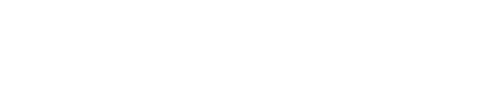
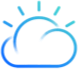

In [6]:
#Web crawling - requests library
#Reading the Newyork weather webpage and getting the temperature from the webpage
import requests

#latitude and longitude of Newyork
url = "https://weather.com/weather/today/l/40.75,-73.98"
response = requests.get(url)
print(response.status_code)
print("----------------------------------------")
print(response.headers)
print("----------------------------------------")
print(response.text) #html data is returned

In [7]:
#web crawling - requests library

#Read a CSV from the Federal Reserve Economics Data and converting it to pandas dataframe
import requests
import pandas as pd
from io import StringIO

url = "https://fred.stlouisfed.org/graph/fredgraph.csv?id=T10YIE&cosd=2017-04-14&coed=2022-04-14"
response = requests.get(url)
if response.status_code == 200:
    csvtext = response.text
    csv_buffer = StringIO(csvtext) #stringio can read large strings and acts like in-memory file buffer.hence it can be passed as file object directly to pandas read csv
    csv_df = pd.read_csv(csv_buffer)
    print(csv_df)
    
#ust an example of how we can use string io - no need to run this block    
#f = io.StringIO("id,name\n1,brian\n2,amanda\n3,zoey\n")
#df = pd.read_csv(f) # pandas takes a file path or a file-like object

            DATE T10YIE
0     2017-04-17   1.88
1     2017-04-18   1.85
2     2017-04-19   1.85
3     2017-04-20   1.85
4     2017-04-21   1.84
...          ...    ...
1299  2022-04-08   2.87
1300  2022-04-11   2.91
1301  2022-04-12   2.86
1302  2022-04-13    2.8
1303  2022-04-14   2.89

[1304 rows x 2 columns]


In [11]:
#web crawling using requests -  for reading JSON format data

#If the data is in the form of JSON, we can read it as text or even let requests decode it for you.
#Following is to pull some data from GitHub in JSON format and convert it into a Python dictionary
import requests

url = "https://api.github.com/users/jbrownlee"
response = requests.get(url)
json_data = response.json()
if response.status_code == 200:
    print(response.headers)
    print("----------------------------------------")
    print(json_data)

{'Server': 'GitHub.com', 'Date': 'Mon, 20 Mar 2023 10:57:02 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Cache-Control': 'public, max-age=60, s-maxage=60', 'Vary': 'Accept, Accept-Encoding, Accept, X-Requested-With', 'ETag': 'W/"a00f5ac627f553bbdd4068807c4c3097f7431207cac10f2ba72f70f945457b2d"', 'Last-Modified': 'Tue, 01 Nov 2022 19:31:20 GMT', 'X-GitHub-Media-Type': 'github.v3; format=json', 'x-github-api-version-selected': '2022-11-28', 'Access-Control-Expose-Headers': 'ETag, Link, Location, Retry-After, X-GitHub-OTP, X-RateLimit-Limit, X-RateLimit-Remaining, X-RateLimit-Used, X-RateLimit-Resource, X-RateLimit-Reset, X-OAuth-Scopes, X-Accepted-OAuth-Scopes, X-Poll-Interval, X-GitHub-Media-Type, X-GitHub-SSO, X-GitHub-Request-Id, Deprecation, Sunset', 'Access-Control-Allow-Origin': '*', 'Strict-Transport-Security': 'max-age=31536000; includeSubdomains; preload', 'X-Frame-Options': 'deny', 'X-Content-Type-Options': 'nosniff', 'X-XSS-Protection': '0', 'Referrer-Policy': 'or

In [12]:
#web crawling using requests -  for reading binary data

#If the URL gives you some binary data, such as a ZIP file or a JPEG image,
#you need to get them in the "content attribute" instead, as this would be the binary data.
#For example, this is how we can download an image (the logo of Wikipedia)
import requests

url = "https://en.wikipedia.org/static/images/project-logos/enwiki.png"
response = requests.get(url)
if response.status_code == 200:
    with open("myfile.jpg", 'wb') as f:
        f.write(response.content)

#### requests library for html web page with lxml and beautifulsoup:

    Given we already obtained the html web page, how should we extract the data? This is beyond what the requests library can provide to us, but we can use a different library to help. There are 2 ways we can do it, depending on how we want to specify the data.

            Using lxml 
            -----------
               The first way is to consider the HTML as a kind of XML document and use the XPath language to extract the element. In this case, we can make use of the lxml library to first create a document object model (DOM) and then search by XPath.
              XPath is a path string that specifies how to find an element. The lxml object provides a function xpath() to search the DOM for elements that match the XPath string, which can be multiple matches. We can learn the xpath string from the  developer tools of the browser by inspecting the HTML source. If we hover on the element after starting the inspect, then we can see the html structure in the elements window

            Using BeautifulSoup:
            --------------------------------------
                The other way is to use CSS selectors on the HTML document, which we can make use of the BeautifulSoup library. Here, we first pass our HTML text to BeautifulSoup. BeautifulSoup supports various HTML parsers, each with different capabilities. It is recommended  by BeautifulSoup to use the lxml library as the parser(and it is also often the fastest). CSS selector is a different mini-language, with pros and cons compared to XPath. The selector is mostly identical to the XPath. Therefore, we can get the same data from both the techniques.


In [22]:
#requests with lxml - to extract the data

#The XPath below means to find an HTML element anywhere with the <span> tag 
#with the attribute data-testid matching “TemperatureValue” and class beginning with “CurrentConditions.”
#This example is to find the temperature of New York City, provided by this particular element we get from this web page

import requests
from lxml import etree

#reading temp of NewYork
url = "https://weather.com/weather/today/l/40.75,-73.98"
response = requests.get(url)

#Create DOM from HTML Text
dom = etree.HTML(response.text)
#providing xpath string to search the dom object - searching for the temperature element and get the content
elements = dom.xpath("//span[@data-testid='TemperatureValue' and contains(@class, 'CurrentConditions')]")
for elem in elements:
    print(elem.text)

32°


In [23]:
!pip install bs4 #beautifulsoup

  Using cached bs4-0.0.1.tar.gz (1.1 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1257 sha256=12edbb65c40872e7d35c87488ecdbc2fae6c83c2c3db03ee81d2a775895c5b32
  Stored in directory: c:\users\malla\appdata\local\pip\cache\wheels\75\78\21\68b124549c9bdc94f822c02fb9aa3578a669843f9767776bca
Successfully built bs4


In [21]:
#requests with Beautifulsoup - to extract the data

#The XPath below means to find an HTML element anywhere with the <span> tag 
#with the attribute data-testid matching “TemperatureValue” and class beginning with “CurrentConditions.”
#This example is to find the temperature of New York City, provided by this particular element we get from this web page

import requests
from bs4 import BeautifulSoup

#reading temp of NewYork
url = "https://weather.com/weather/today/l/40.75,-73.98"
response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, "lxml")
    elements = soup.select("span[data-testid='TemperatureValue'][class^='CurrentConditions']")
    for elem in elements:
        print(elem.text)
        
#Note: We can collect a time series of the temperature by running this script on a regular schedule. 
#Similarly, we can collect data automatically from various websites. 
#This is how we can obtain data for our machine learning projects.

32°


### Reading Tables on the Web Using Pandas:
    Very often, web pages will use tables to carry data. If the page is simple enough, we may even skip inspecting it to find out the XPath or CSS selector and use pandas to get all tables on the page in one shot. It is simple enough to be done in one line
    The read_html() function in pandas reads a URL and finds all the tables on the page. Each table is converted into a pandas DataFrame and then returns all of them in a list. In the below example, we are reading the List_of_TCP_and_UDP_port_numbers from the Wikipedia. The table columns are identified by pandas automatically.
    
    Chances are that not all tables are what we are interested in. Sometimes, the web page will use a table merely as a way to format the page, but pandas may not be smart enough to tell. Hence we need to test and cherry-pick the result returned by the read_html() function.

In [39]:
#Reading table from web using pandas
import pandas as pd

#specify headers to solve the forbidden access
# user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36"
# headers={'User-Agent':user_agent} 

url = "http://en.wikipedia.org/wiki/List_of_TCP_and_UDP_port_numbers"
table_df = pd.read_html(url)
print(type(table_df))
print(table_df)

#Note: Sometimes, you get HTTP Error 403: Forbidden error while accessing the url
#This error usually occurs when the server you are requesting doesn't know where the request is coming from, the server does this to avoid any unwanted visit. You could bypass this error by defining a header and passing it along the urllib.request

<class 'list'>
[    0                                                  1
0 NaN  This article has multiple issues. Please help ...
1 NaN  This article needs additional citations for ve...
2 NaN  This article gives self-sourcing popular cultu...,     0                                                  1
0 NaN  This article needs additional citations for ve...,     0                                                  1
0 NaN  This article gives self-sourcing popular cultu...,          Cell                                        Description
0         Yes  Described protocol is assigned by IANA for thi...
1  Unofficial  Described protocol is not assigned by IANA for...
2    Assigned  Described protocol is assigned by IANA for thi...
3          No  Described protocol is not: assigned by IANA fo...
4    Reserved  Port is reserved by IANA,[2] generally to prev...,           Port         TCP         UDP SCTP DCCP  \
0            0    Reserved    Reserved  NaN  NaN   
1            1         Yes    

#### Reading Dynamic Content With Selenium
    A significant portion of modern-day web pages is full of JavaScripts. This gives us a fancier experience but becomes a hurdle to use as a program to extract data. One example is Yahoo’s home page, which, if we just load the page and find all news headlines, there are far fewer than what we can see on the browser.
    This is because web pages like this rely on JavaScript to populate the content. Famous web frameworks such as AngularJS or React are behind powering this category. The Python library, such as requests, does not understand JavaScript. Therefore, you will see the result differently. If the data you want to fetch from the web is one of them, you can study how the JavaScript is invoked and mimic the browser’s behavior in your program. But this is probably too tedious to make it work.

    The other way is to ask a real browser to read the web page rather than using requests. This is what Selenium can do. Before we can use it, we need to install the library
                                      pip install selenium
                                      
      But Selenium is only a framework to control browsers. You need to have the browser installed on your computer as well as the driver to connect Selenium to the browser. If you intend to use Chrome, you need to download and install ChromeDriver too. You need to put the driver in the executable path so that Selenium can invoke it like a normal command. For example, in Linux, you just need to get the chromedriver executable from the ZIP file downloaded and put it in /usr/local/bin. Similarly, if you’re using Firefox, you need the GeckoDriver. Afterward, you can use a Python script to control the browser behavior.
      
      The below code works as follows. We first launch the browser in headless mode, meaning we ask Chrome to start but not display on the screen. This is important if we want to run our script remotely as there may not be any GUI support. Note that every browser is developed differently, and thus the options syntax we used is specific to Chrome. If we use Firefox, the code would be this instead:
                        options = webdriver.FirefoxOptions()
                        options.set_headless()
                        browser = webdriver.Firefox(firefox_options=options)
                        
       After we launch the browser, we give it a URL to load. But since it takes time for the network to deliver the page, and the browser will take time to render it, we should wait until the browser is ready before we proceed to the next operation. We detect if the browser has finished rendering by using JavaScript. We make Selenium run a JavaScript code for us and tell us the result using the execute_script() function. We leverage Selenium’s WebDriverWait tool to run it until it succeeds or until a 30-second timeout. As the page is loaded, we scroll to the bottom of the page so the JavaScript can be triggered to load more content. Then we wait for one second unconditionally to make sure the browser triggered the JavaScript, then wait until the page is ready again. Afterward, we can extract the news headline element using XPath (or alternatively using a CSS selector). Because the browser is an external program, we are responsible for closing it in our script.

    Using Selenium is different from using the requests library in several aspects. First, you never have the web content in your Python code directly. Instead, you refer to the browser’s content whenever you need it. Hence the web elements returned by the find_elements() function refer to objects inside the external browser, so we must not close the browser before we finish consuming them. Secondly, all operations should be based on browser interaction rather than network requests. Thus you need to control the browser by emulating keyboard and mouse movements. But in return, you have the full-featured browser with JavaScript support. For example, you can use JavaScript to check the size and position of an element on the page, which you will know only after the HTML elements are rendered.
    
    There are a lot more functions provided by the Selenium framework that we can cover here. It is powerful, but since it is connected to the browser, using it is more demanding than the requests library and much slower. Usually, this is the last resort for harvesting information from the web.

In [40]:
!pip install selenium

     ---------------------------------------- 6.9/6.9 MB 6.2 MB/s eta 0:00:00
     -------------------------------------- 384.9/384.9 kB 8.0 MB/s eta 0:00:00
     ---------------------------------------- 58.3/58.3 kB 3.0 MB/s eta 0:00:00


In [58]:
import time
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options

 
# Launch Chrome browser in headless mode
# options = webdriver.ChromeOptions()
# options.add_argument("headless")
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument("--headless")
# chrome_options.headless = True # also works
browser = webdriver.Chrome(options=chrome_options)
 
# Load web page
browser.get("https://www.yahoo.com")

# Network transport takes time. Wait until the page is fully loaded
def is_ready(browser):
    return browser.execute_script(r"""
        return document.readyState === 'complete'
    """)
WebDriverWait(browser, 30).until(is_ready)
 
# Scroll to bottom of the page to trigger JavaScript action
browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(1)
WebDriverWait(browser, 30).until(is_ready)
 
# Search for news headlines and print
elements = browser.find_elements(By.XPATH, "//h3/a[u[@class='StretchedBox']]")
for elem in elements:
    print(elem.text)

#Close the browser once finish
browser.close()

In [55]:
import time

from selenium import webdriver
from selenium.webdriver.chrome.service import Service

service = Service("C:/Users/malla/chromedriver_win32/chromedriver.exe")
driver = webdriver.Chrome(service=service)

driver.get('http://www.google.com/');

time.sleep(5) # Let the user actually see something!

search_box = driver.find_element('q')

search_box.send_keys('ChromeDriver')

search_box.submit()

time.sleep(5) # Let the user actually see something!

driver.quit()

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=111.0.5563.65)
Stacktrace:
Backtrace:
	(No symbol) [0x00A9DCE3]
	(No symbol) [0x00A339D1]
	(No symbol) [0x00944DA8]
	(No symbol) [0x0092D0D3]
	(No symbol) [0x0098EA8B]
	(No symbol) [0x0099D093]
	(No symbol) [0x0098ACC6]
	(No symbol) [0x00966F68]
	(No symbol) [0x009680CD]
	GetHandleVerifier [0x00D13832+2506274]
	GetHandleVerifier [0x00D49794+2727300]
	GetHandleVerifier [0x00D4E36C+2746716]
	GetHandleVerifier [0x00B46690+617600]
	(No symbol) [0x00A3C712]
	(No symbol) [0x00A41FF8]
	(No symbol) [0x00A420DB]
	(No symbol) [0x00A4C63B]
	BaseThreadInitThunk [0x74F37D69+25]
	RtlInitializeExceptionChain [0x7725B74B+107]
	RtlClearBits [0x7725B6CF+191]


In [32]:
#Using urllib for webscraping
import urllib.request

user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36"

url = "http://en.wikipedia.org/wiki/List_of_TCP_and_UDP_port_numbers"
# url = "https://finance.yahoo.com/"
headers={'User-Agent':user_agent,} 

try:
    request = urllib.request.Request(url, None, headers)
    response = urllib.request.urlopen(request)
    data = response.read()
    print(data)

except urllib2.HTTPError as e:
    print(e.fp.read())

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>List of TCP and UDP port numbers - Wikipedia</title>\n<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enable

#### Web Crawling using scrapy:
    Scrapy is a Python open-source web crawling framework used for large-scale web scraping. It is a web crawler used for both web scraping and web crawling. It gives you all the tools you need to efficiently extract data from websites, process them as you want, and store them in your preferred structure and format. With Scrapy you don’t need to reinvent the wheel.
        -------------------------------
        Web scraping and Web crawling:
        --------------------------------
        Web scraping is about extracting data from one or more websites. While crawling is about finding or discovering URLs or links on the web. Usually, in web data extraction projects, we need to combine crawling and scraping. A crawler(or spider) will follow each link in the page it crawls from the starter page. This is why it is also referred to as a spider bot since it will create a kind of a spider web of pages. A scraper will extract the data from a page, usually from the pages downloaded with the crawler
        Egs of web crawlers: Amazonbot is the Amazon web crawler. Bingbot is Microsoft's search engine crawler for Bing. DuckDuckBot is the crawler for the search engine DuckDuckGo. Googlebot is the crawler for Google's search engine.
        
         In order to get information from a website, you will have to first run a crawler on it. A crawler is a program that browses websites and downloads content. Sometimes crawlers are also referred to as spiders. A crawler needs a starting point(url) to start crawling(downloading) content.
         
         Scrapy Shell:
         ------------
         Scrapy provides a shell of its own that you can use to experiment. To start the scrapy shell in your command line, type:  scrapy shell
         To run the crawler in the shell type: fetch("url")
         When you crawl something with scrapy, it returns a “response” object that contains the downloaded information. can be viewed by typing: view(response). This command will open the downloaded page in your default browser that looks exactly like the website. This means the crawler has successfully downloaded the entire web page.
         We can also see the raw content using: print(response.text).
         It gives a lot of content, but not all of it is relevant. We can make a shortlist of things that need to be extracted like Title, Number of votes it has, Number of comments, Time of post creation etc and extract these things from the response. Scrapy provides ways to extract information from HTML based on css selectors like class, id, etc. We can find the css selector for all of these in the web page by “Inspect” or “Inspect Element” in the developer tools.
                 
                 Eg: response.css(".title::text").extract() 
            
            For suppose, the css class “title” is applied to all <p> tags that have titles. This will help in filtering out elements with class titles from the rest of the content in the response object. Here response.css(..) is a function that helps extract content based on css selector passed to it. The ‘.’ is used with the title because it’s a css class. Also, you need to use “::text” to tell your scraper to extract only the text content of the matching elements. This is done because scrapy directly returns the matching element along with the HTML code.
            
                    Note: response.css(".title::text").extract_first() gives the first line in the extracted text
                    
           When more than two CSS selectors are required to identify an element, we use them both. Also, since both are CSS classes, we have to use “.” with their names. Here both score and unvoted are css selectors of an html element <div class="score unvoted" title="voted"/>
           
                       response.css(".score.unvoted::text").extract_first()
                       
              The .attr(attributename) is used to get the value of the specified attribute of the matching element. the “time” element contains the time. Extracting the “title” attribute of element time.
              
                          response.css("time::attr(title)").extract()
                          
         Ref: https://www.analyticsvidhya.com/blog/2017/07/web-scraping-in-python-using-scrapy/

In [59]:
!pip install scrapy

     -------------------------------------- 272.9/272.9 kB 4.2 MB/s eta 0:00:00
     ---------------------------------------- 93.9/93.9 kB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 3.1/3.1 MB 5.1 MB/s eta 0:00:00
     ---------------------------------------- 74.6/74.6 kB ? eta 0:00:00
     ---------------------------------------- 45.5/45.5 kB ? eta 0:00:00


### Multiprocessing
    When you work on a computer vision project, you probably need to preprocess a lot of image data. This is time-consuming, and it would be great if you could process multiple images in parallel. Multiprocessing is the ability of a system to run multiple processors at one time. If you had a computer with a single processor, it would switch between multiple processes to keep all of them running. However, most computers today have at least a multi-core processor, allowing several processes to be executed at once. The Python Multiprocessing Module is a tool for you to increase your scripts’ efficiency by allocating tasks to different processes
    Multiprocessing can make a program substantially more efficient by running multiple tasks in parallel(concurrently) instead of sequentially. A similar term is multithreading, but they are different.
    
#### Process and Thread:
        
    A computer program is a collection of instructions. A process is the execution of those instructions. A thread is a subset of the process. A process can have one or more threads.
    
    A process is a program loaded into memory to run(to execute) and does not share its memory with other processes. A thread is an execution unit within a process. Multiple threads run in a process and share the process’s memory space with each other. Every Python program is a process and has one default thread called the main thread used to execute your program instructions. Each process is, in fact, one instance of the Python interpreter that executes Python instructions (Python byte-code), which is a slightly lower level than the code you type into your Python program. A thread always exists within a process and represents the manner in which instructions or code is executed. A process will have at least one thread, called the main thread. Any additional threads that we create within the process will belong to that process.
    
    Python’s Global Interpreter Lock (GIL) only allows one thread to be run at a time under the interpreter, which means you can’t enjoy the performance benefit of multithreading if the Python interpreter is required. This is what gives multiprocessing an upper hand over threading in Python. Multiple processes can be run in parallel because each process has its own interpreter that executes the instructions allocated to it. Also, the OS would see your program in multiple processes and schedule them separately, i.e., your program gets a larger share of computer resources in total. So, multiprocessing is faster when the program is CPU-bound. In cases where there is a lot of I/O in your program, threading may be more efficient because most of the time, your program is waiting for the I/O to complete. However, multiprocessing is generally more efficient because it runs concurrently.
    
    Let’s use the Python Multiprocessing module to write a basic program(see below cell) that demonstrates how to do concurrent programming. If we observe, task(), sleeps for 0.5 seconds and prints before and after the sleep.  To create a process, we simply use the multiprocessing module. The target argument to the Process() specifies the target function that the process runs.  These processes do not run immediately until we start them using start(). We must fence our main program under if __name__ == "__main__" or otherwise the multiprocessing module will complain. This safety construct guarantees Python finishes analyzing the program before the sub-process is created.
    
    Note: The function executed in some process(just like task()) may have arguments in which case they can be specified as a tuple and passed to the "args" argument of the multiprocessing.Process class constructor or as a dictionary to the “kwargs” argument.
                process = multiprocessing.Process(target=task, args=(arg1, arg2))

    However, there is a problem with the below code, as the program timer is printed before the processes we created are even executed. Check the output

In [92]:
import time
import multiprocessing

def task():
    print("Sleeping for 0.5 seconds")
    time.sleep(0.5)
    print("Finished Sleeping")
    
if __name__ == "__main__":
    start_time = time.perf_counter()
    
    #creating the processes
    p1 = multiprocessing.Process(target=task)
    p2 = multiprocessing.Process(target=task)
    
    # Starts both processes
    p1.start()
    p2.start()
    
    end_time = time.perf_counter()
    print(f"Finished multiprocessing of 2 processes in {end_time-start_time} seconds")
    

Finished multiprocessing of 2 processes in 0.01228679995983839 seconds


    
    ---------------------------------------------------------
    Solution: We need to call the join() function on the two processes to make them run before the time prints by the main process
    
    This is because three processes are going on: p1, p2, and the main process. The main process is the one that prints the time taken to execute. 
    
    When process calls the start() function, it does not start the process immediately, but instead allows the operating system to schedule the function to execute as soon as possible. At some point a new instance of the Python interpreter is created that has a new thread which will execute our target function. The main thread of our initial process doesnot wait for our new process to complete and hence the finished print statement is printed first
    
    By adding join() statement after start(), the main thread of our initial process then waits for the new process to complete, then calls the join() function to explicitly block and wait for the new process to terminate. Once the custom function returns, the new process is closed. The join() function then returns and the main thread exits.
    
     We just need to add this snippet of code p.join() immediately after the start() function calls. The join() function allows us to make other processes wait until the processes that had join() called on it are complete.
     
     Starting a new process and then joining it back to the main process is how multiprocessing works in Python (as in many other languages)
     
     Note: subprocess print issue: https://stackoverflow.com/questions/68005034/multiprocessing-in-python-doesnt-print-any-statements

In [95]:
#with start() and join(), we can make more processes run. 
#The following is the complete code modified from above to have 10 processes

import multiprocessing
import time
 
def task():
    print('Sleeping for 0.5 seconds')
    time.sleep(0.5)
    print('Finished sleeping')

if __name__ == "__main__": 
    start_time = time.perf_counter()
    processes = []
 
    # Creates 10 processes then starts them
    for i in range(10):
        p = multiprocessing.Process(target = task)
        p.start()
        processes.append(p)
    
    # Joins all the processes 
    for p in processes:
        p.join()
 
    finish_time = time.perf_counter()
 
    print(f"Program finished in {finish_time-start_time} seconds")

Program finished in 0.16352669999469072 seconds


In [96]:
# example of multiprocessing with arguments
from time import sleep
from multiprocessing import Process
 
# a custom function that blocks for a moment
def task(sleep_time, message):
    # block for a moment
    sleep(sleep_time)
    # display a message
    print(message)
    
if __name__ == '__main__':
    
    start_time = time.perf_counter()
    
    # create a process
    process_1 = Process(target=task, args=(1.5, 'New message from another process'))
    process_2 = Process(target=task, args=(1.5, 'New message from another process'))
    
    # run the process
    process_1.start()
    process_2.start()
    
    # wait for the process to finish
    print('Waiting for the process...')
    process_1.join()
    process_2.join()
    
    end_time = time.perf_counter()
    print(f"Finished multiprocessing of 2 processes in {end_time-start_time} seconds")

Waiting for the process...
Finished multiprocessing of 2 processes in 0.08863100002054125 seconds


#### Multiprocessing with arguments:

    The reason we want to run multiprocessing is probably to execute many different tasks concurrently for speed. It can be an image processing function, which we need to do on thousands of images. It can also be to convert PDFs into plaintext for the subsequent natural language processing tasks, and we need to process a thousand PDFs. Usually, we will create a function that takes an argument (e.g., filename) for such tasks.
    -------------------------------------------------------------------   
    def cube(x):
        return x**3
    
    if __name__ == "__main__":
        processes = [multiprocessing.Process(target=cube, args=(x,)) for x in range(1,1000)]
        [p.start() for p in processes]
        result = [p.join() for p in processes]
        print(result)
    
    ---------------------------------------------------------------
    However, this above will not work as we have only a handful of cores in our computer. Running 1,000 processes is creating too much overhead and overwhelming the capacity of our OS. Also, we may exhaust your memory. The better way is to run a process "pool" to limit the number of processes that can be run at a time
    
#### multiprocesses with arguments using pool, map and concurrent.futures:
    multiprocessing.Pool() creates the pool which we use to specify no. of processes to run at a time. The argument for multiprocessing.Pool() is the number of processes to create in the pool. If omitted, Python will make it equal to the number of cores you have in your computer.

    We can use the apply_async() function to pass the arguments to the function cube() in a list comprehension. This will create tasks for the pool to run. It is called “async” (asynchronous) because we didn’t wait for the task to finish, and the main process may continue to run. Therefore the apply_async() function does not return the result but an object that we can use, get(), to wait for the task to finish and retrieve the result. Since we get the result in a list comprehension, the order of the result corresponds to the arguments we created in the asynchronous tasks. However, this does not mean the processes are started or finished in this order inside the pool.
    If we think writing lines of code to start processes and join them is too explicit, we can consider using map() instead. We don’t have to use the start() and join() when using map() because it is hidden behind the pool.map() function. What it does is split the iterable range(1, 1000) into chunks and runs each chunk in the pool. The map function is a parallel version of the list comprehension
    
    But the modern-day alternative is to use map from "concurrent.futures". The concurrent.futures map() runs the multiprocessing module under the hood. The beauty of doing so is that we can change the program from multiprocessing to multithreading by simply replacing "ProcessPoolExecutor with ThreadPoolExecutor". Of course, we have to consider whether the global interpreter lock is an issue for our code.

In [ ]:
#Multiprocessing with pool - 
#Note!!! - dont run the multiprocessing with pool in notebook--  may run forever
#it only works when we save the entire code as a script and then ran the script using %run myscript.py in notebook
# import time
# import multiprocessing

# def cube(x):
#     return x**3

# if __name__ == "__main__": #guarding
#     pool = multiprocessing.Pool(processes=3)
#     start_time = time.perf_counter()
#     processes = [pool.apply_async(cube, args=(x,)) for x in range(1, 1000)]
#     result = [p.get() for p in processes]
#     finish_time = time.perf_counter()
#     print(f"Program finished in {finish_time-start_time} seconds")
#     print(result)

In [ ]:
#Multiprocessing with map - dont run
# import time
# import multiprocessing

# def cube(x):
#     return x**3

# if __name__ == "__main__":
#     pool = multiprocessing.Pool(processes=3)
#     start_time = time.perf_counter()
#     result = pool.map(cube, range(1, 1000)) #similar to result = [cube(x) for x in range(1,1000)]
#     finish_time = time.perf_counter()
#     print(f"Program finished in {finish_time-start_time} seconds")
#     print(result)

In [6]:
#Multiprocessing with concurrent.futures
import concurrent.futures
import time

def cube(x):
    return x**3

def main():
    with concurrent.futures.ProcessPoolExecutor(3) as executor:
        start_time = time.perf_counter()
        result = executor.map(cube, range(1, 1000)) #similar to result = [cube(x) for x in range(1,1000)]
    finish_time = time.perf_counter()
    print(f"Program finished in {finish_time-start_time} seconds")
    print(result)
    
if __name__ == "__main__":
    main()
    

Program finished in 0.1629322000000002 seconds
<generator object _chain_from_iterable_of_lists at 0x000001F329910900>


#### Parallel processing with joblib:
    The package joblib is a set of tools to make parallel computing easier. It is a common third-party library for multiprocessing. It also provides caching and serialization functions. To install the joblib package, use the command in the terminal 
                pip install joblib
                
     In the below code, we use Parallel() and delayed(). The delayed() function is a wrapper to another function to make a "delayed" version of the function call. Which means it will not execute the function immediately when it is called.

    Here we call the delayed function multiple times with different sets of arguments we want to pass to it. 
                      (delayed(cube)(i) for i in range(1, 1000))
    
    But we can also similarly pass tuple directly. For example, when we give integer 1 to the delayed version of the function cube, instead of computing the result, we produce a tuple, (cube, (1,), {}) for the function object, the positional arguments, and keyword arguments, respectively.

    We created the engine instance with Parallel(). When it is invoked like a function(without delayed()) with the list of tuples as an argument, it will actually execute the job as specified by each tuple in parallel and collect the result as a list after all jobs are finished i.e, We can also write the tuples directly as below
              
              result = Parallel(njobs=3)((cube, (i,), {}) for i in range(1, 1000))
    
    Here we created the Parallel() instance with n_jobs=3, so there will be three processes running in parallel. The benefit of using joblib is that we can run the code in multithread by simply adding an additional argument prefer="threads" to Parallel()
    
            result = Parallel(njobs=3, prefer="threads")((cube, (i,), {}) for i in range(1, 1000))

In [7]:
!pip install joblib

In [18]:
#multiprocessing with joblib and delayed()
from joblib import Parallel, delayed
import time

def cube(x):
    return x**3

start_time = time.perf_counter()
result = Parallel(n_jobs=3)(delayed(cube)(i) for i in range(1, 1000))
end_time = time.perf_counter()
print(f"Finished multiprocessing in {end_time-start_time} seconds")
print(result[:5])

Finished multiprocessing in 0.07438479998381808 seconds
[1, 8, 27, 64, 125]


In [10]:
# multiprocessing with joblib and Parallel() and tuple version of delayed()
from joblib import Parallel
import time

def cube(x):
    return x**3

start_time = time.perf_counter()
result = Parallel(n_jobs=3)((cube, (i,), {}) for i in range(1, 1000))
end_time = time.perf_counter()
print(f"Finished multiprocessing in {end_time-start_time} seconds")
print(result[:5])

Finished multiprocessing in 0.07985969999981535 seconds
[1, 8, 27, 64, 125]


### Web Frameworks in Python

    What actually is a framework?
        Originally, a framework means a structure that supports or frames something, like in a building. In software, a framework is a cohesive set of individual components (with reusable functionalities) that are developed and used by developers to build well-structured, reliable software and systems. Frameworks are available in code form (called libraries) and are designed to run independently or together to easily achieve a complicated task. With frameworks, developers could create projects easily and faster since they don’t need to start development from scratch; the framework takes care of the low-level functionality and helps developers to avoid reinventing the wheel. You only need to learn how to customize the frameworks to your specific technical/business needs. Eg: numpy, pandas and so on
        
    Intro to webframeworks:
    ---------------------
        The tools that allow us to write programs(in Python) to build a web-based application are called web frameworks
    
        It is quite common for Data Scientists to deploy endpoints and API’s in order to make their data reachable via HTTP to other people
        
    When we finish a Python project and roll it out for other people to use, the easiest way is to present our project as a command-line program. If you want to make it friendlier, you may want to develop a GUI for your program so people can interact with it with mouse clicks while it runs. Developing a GUI can be difficult as the model of human-computer interaction is complex. Therefore, a compromise is to create a "web interface" for your program. It requires some extra work compared to a pure command-line program. Web frameworks helps in creating web interfaces
    
    Popular python web frameworks 
        - Flask
        - Django
        - Dash
        - FastAPI
        - Emmet
        
    
    Python and the Web:
    -------------------
        The web is served using the hypertext transfer protocol (HTTP). Python’s standard library comes with support for interacting with HTTP. If you simply want to run a web server with Python, nothing can be easier than going to a directory of files to serve and run the command
                                    
                                    python -m htttp.server
                
      This will usually launch a web server at port 8000. If index.html exists in the directory, that would be the default page to serve if we open a browser on the same computer with the address http://localhost:8000/.  
      
      This built-in web server is great if we just need to quickly set up a web server (e.g., let another computer on the local network download a file). But it would not be sufficient if we want to do more, such as having some dynamic content. 
      
      Local server/local host and webserver:
      ------------------------------------------
       A local server is a computer program that serves content, such as web pages, to users over the same local area network (LAN). Client server applications are installed on a local computer or server and are accessed by users on the same local network, while web based applications are hosted on a remote server and accessed by users over the internet.

    Before we move on to the details, let's review what we would like to achieve when we speak of the web interface. Firstly, a web page in the modern day would be an interface for disseminating information to the user interactively. This means not only sending information from the server but also receiving input from the user. The browser is capable of rendering the information aesthetically.
    
    Alternatively, we may use a web page without a browser(eg: desktop applications). A case would be to download a file using web protocols. In Linux, we have the wget tool famous for doing this task. Another case is to query information or pass information to the server. In Linux instances, we may use the curl tool to check. Its output will not be in HTML but in a plain-text machine-readable format. Sometimes, we call this the web API as we use it like a remotely executed function.
    
    Note: desktop application: A user can download it from the internet or install it via a data storage service. Desktop apps operate as stand-alone software, which means they can be used offline and do not require access to the internet or web browser to work.
    
    These are two different paradigms in web applications. The first one needs to write code for the interaction between user and server. The second one needs to set up various end-points on the URL so users can request different things using different addresses. In Python, there are third-party libraries to do both like Flask, Dash
    
#### Flask for Web API applications:
        Flask is a lightweight web framework. You can run it as a command and use it as a Python module.
        
        Let’s say we want to write a web server that reports the current time in any user-specified time zone. It can be done using Flask in a trivial way below.
        We can save the below code as server.py or any filename you like, then run it on a terminal with python filename.py

In [18]:
#Flask - Time zone time reporting web api
from datetime import datetime
import pytz
from flask import Flask

app = Flask("timenow")

@app.route("/now/<path:timezone>")
def reporttime(timezone):
    try:
        zone = pytz.timezone(timezone)
        timenow = datetime.now(zone)
        return timenow.strftime("%Y-%m-%d %H:%M:%S %z %Z\n")
    except pytz.exceptions.UnknownTimeZoneError:
        return f"Unknown Timezone - {timezone}\n"

app.run()

 * Serving Flask app 'timenow' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [17/Mar/2023 12:31:02] "GET /now/Asia HTTP/1.1" 200 -
127.0.0.1 - - [17/Mar/2023 12:31:03] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [17/Mar/2023 12:31:17] "GET /now/Asia/India HTTP/1.1" 200 -
127.0.0.1 - - [17/Mar/2023 12:31:25] "GET /now/Asia/Tokyo HTTP/1.1" 200 -


    We ll see the below lines stating the application is serving now
        --------------------------------------------------------
            * Serving Flask app 'time now' (lazy loading)
             * Environment: production
               WARNING: This is a development server. Do not use it in a production deployment.
               Use a production WSGI server instead.
             * Debug mode: off
     ----------------------------------------------------------------
             This means your script is now running as a web server at http://127.0.0.1:5000. It will serve web requests forever until you interrupt it with Ctrl-C. If you open up another terminal and query for the URL, e.g., using curl in Linux or if you open browser and query the URL, you will be able to see the timezone
             
             You will see the time printed on the screen in the time zone you requested .(for eg http://127.0.0.1:5000/Asia/Tokyo) you can see the list of all supported time zone on Wikipedia. The string returned by the function in your code will be the content responded by the URL. If the time zone is not recognized, you will see the “Unknown time zone” message as returned by the except block in the code above.
             
             Nowadays, many such applications return a JSON string for more complex data, but technically anything can be delivered. If you wish to create more web APIs, simply define your functions to return the data and decorate it with @app.route() as in the below examples.

In [19]:
#curl http://127.0.0.1:5000/now/Asia/Tokyo
#we can use curl command to check the output in the shell
#or we can execute the same url in the browser that displays the output

In [27]:
#Flask with defaults - extension of previous timezone program
#We will assume UTC if no time zone is provided. For that we just need to add another decorator to the function

from datetime import datetime
import pytz
from flask import Flask

app = Flask("myapp")

@app.route("/now", defaults={'tymzone': ''})
@app.route("/now/<path:tymzone>")
def result(tymzone):
    try:
        if not tymzone:
            zone = pytz.utc
        else:
            zone = pytz.timezone(tymzone)
        timenow = datetime.now(zone)
        return timenow.strftime("%Y-%m-%d %H:%M:%S %z %Z\n")
    except pytz.exceptions.UnknownTimeZoneError:
        return f"Unknow timezone: {tymzone}"

app.run()
# app.run(debug=True) #with debug on

 * Serving Flask app 'myapp' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [17/Mar/2023 12:54:28] "GET /now/Asia/Tokyo HTTP/1.1" 200 -
127.0.0.1 - - [17/Mar/2023 12:54:33] "GET /now/Asia/ HTTP/1.1" 200 -
127.0.0.1 - - [17/Mar/2023 12:54:43] "GET /now/ HTTP/1.1" 404 -
127.0.0.1 - - [17/Mar/2023 12:54:50] "GET /now HTTP/1.1" 200 -
127.0.0.1 - - [17/Mar/2023 12:55:00] "GET /now/Asia/Tokyo HTTP/1.1" 200 -


In [ ]:
#flask example to host the ML model onto the webserver
import os
import pandas as pd 
import numpy as np 
import flask
import pickle
from flask import Flask, render_template, request

app=Flask(__name__)

@app.route("/")
def index():
    return flask.render_template("index.html")

def ValuePredictor(to_predict_list):
    to_predict = np.array(to_predict_list).reshape(1, 4)
    loaded_model = pickle.load(open("model.pkl", "rb")) #deserializing the serialized model i.e pickled model
    result = loaded_model.predict(to_predict)
    return result[0]

@app.route("/predict", methods = ["POST"]) #when user submit the form of index.html, then this method ll execute as we mentioned POST
def result():
    if request.method == "POST":
        to_predict_list = request.form.to_dict()
        to_predict_list = list(to_predict_list.values())
        to_predict_list = list(map(float, to_predict_list))
        result = ValuePredictor(to_predict_list)
        prediction = str(result)
        return render_template("predict.html", prediction=prediction)

if __name__ == "__main__":
    app.run(debug=True)
    
#In the index file(html file takes i/p of iris features form user), 
#we will have to give a form to input the sepal and petal length and width for the model to classify it into type of Iris. 
#We are using the POST method for this. As you can see in the /predict route, we are collecting all the form values.
#So we get all the features for predicting the Iris type.
#In the ValuePredictor function, we reshape the features to suit the model.
#We then load the pickle file, model.pkl and use that to predict the Iris type from the input features.
#The predicted string is returned to the route and given to the html file, predict.html.

####  API and endpoint:
    
    API - the code that allows two software programs to communicate with each other
    
    An API endpoint is a point at which an API connects with the software program. APIs work by sending requests for information from a web application or web server and receiving a response. In other words, API endpoints are the specific digital location where requests for information are sent by one program to retrieve the digital resource that exists there. 
    Endpoints specify where APIs can access resources and help guarantee the proper functioning of the incorporated software. An API's performance depends on its capacity to successfully communicate with API endpoints.Software programs typically have multiple API endpoints. For APIs, an endpoint can include a URL of a server or service. Systems that communicate through APIs are integrated systems. One side sends the information to the API and is called the server. The other side, the client, makes the requests and manipulates the API. The server side that provides the requested information, or resources, is the API endpoint. For an effective request to be processed by the endpoint, the client must provide a uniform resource locator (URL), a method, a list of headers and a body. The headers provide metadata about a request and the body holds the data sent by the client to the server. Endpoints work in tandem with API methods. Methods are permitted requests that can be made, such as GET, DELETE, PATCH or POST. Methods often called verbs in communications syntax and are often placed just before the specified endpoint in a full URL.
    
    Examples of API endpoints:
    -------------------------
    1. The code used in placing a request for a specific statistics page on the NBA's web site might read:
                   " GET https://stats.nba.com/stats/allstarballotpredictor "
    In this example GET is the method while the endpoint is the specific portion of the web address noted as /stats/allstarballotpredictor. 
    
    2. If, on the other hand, an application is requesting information from Amazon's DynamoDB service, its request may 
     read https://dynamodb.us-west-2.amazonaws.com.

    3. If a Facebook developer wanted to request metrics on an Instagram Business or Creator Account, they could use the Instagram Graph API to query the Instagram metrics endpoint. The request would look something like this:

                GET graph.facebook.com/17841405822304914/insights
                    ?metric=impressions,reach,profile_views
                    &period=day

#### Dash for Interactive Widgets
    The web end points, as provided by Flask, are powerful. A lot of web applications are done in this way. For example, we can write the web user interface using HTML and handle the user interaction with Javascript. Once the user triggers an event, we can let Javascript handle any UI change and create an AJAX call(XMLHTTPRequest) to the server by sending data to an end point and waiting for the reply. An AJAX call is asynchronous; hence when the web server’s response is received (usually within a fraction of a section), Javascript is triggered again to further update the UI to let the user know about it.
    
    However, as the web interface gets more and more complex, writing Javascript code can be tedious. Hence there are many client-side libraries to simplify this. Some are to simplify Javascript programming, such as jQuery. Some are to change the way HTML and Javascript should interact, such as ReactJS. But since we are developing machine learning projects in Python, it would be great to develop an interactive web application in Python without resorting to Javascript. Dash is a tool for this.
    
    Let’s consider an example in machine learning: We want to use the MNIST handwritten digits dataset to train a handwritten digit recognizer. The LeNet5 model is famous for this task. But we want to let the user fine-tune the LeNet5 model, retrain it, and then use it for recognition. Training a simple LeNet5 model can be done with only a few lines of code as we did in Notebook 18.
    There are several hyperparameters that we can change in that code, such as the activation function, the optimizer for training, the number of epochs, and the batch size. We can make an interface in Dash to let the user change these and retrain the model. This interface will be presented in HTML but coded in Python.

In [42]:
#Dash - Lenet Handwriting recognition
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, AveragePooling2D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
 
import plotly.express as px
from dash import Dash, html, dcc
from dash.dependencies import Input, Output, State
from flask import Flask
 

server = Flask("mlm")
app = Dash(server=server)

# Load MNIST digits
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = np.expand_dims(X_train, axis=3).astype("float32")
X_test = np.expand_dims(X_test, axis=3).astype("float32")
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#defaults
model_data = {
    "activation": "relu",
    "optimizer": "adam",
    "epochs": 100,
    "batchsize": 32,
}

#training
def train():
    activation = model_data["activation"]
    model = Sequential([
        Conv2D(6, (5, 5), activation=activation,
               input_shape=(28, 28, 1), padding="same"),
        AveragePooling2D((2, 2), strides=2),
        Conv2D(16, (5, 5), activation=activation),
        AveragePooling2D((2, 2), strides=2),
        Conv2D(120, (5, 5), activation=activation),
        Flatten(),
        Dense(84, activation=activation),
        Dense(10, activation="softmax")
    ])
    model.compile(loss="categorical_crossentropy",
                  optimizer=model_data["optimizer"],
                  metrics=["accuracy"])
    earlystop = EarlyStopping(monitor="val_loss", patience=3,
                              restore_best_weights=True)
    history = model.fit(
            X_train, y_train, validation_data=(X_test, y_test),
            epochs=model_data["epochs"],
            batch_size=model_data["batchsize"],
            verbose=0, callbacks=[earlystop])
    return model, history
 
#html layout 
app.layout = html.Div(
    id="parent",
    children=[
        html.H1(
            children="LeNet5 training",
            style={"textAlign": "center"}
        ),
        html.Div(
            className="flex-container",
            children=[
                html.Div(children=[
                    html.Div(id="activationdisplay"),
                    dcc.Dropdown(
                        id="activation",
                        options=[
                            {"label": "Rectified linear unit", "value": "relu"},
                            {"label": "Hyperbolic tangent", "value": "tanh"},
                            {"label": "Sigmoidal", "value": "sigmoid"},
                        ],
                        value=model_data["activation"]
                    )
                ]),
                html.Div(children=[
                    html.Div(id="optimizerdisplay"),
                    dcc.Dropdown(
                        id="optimizer",
                        options=[
                            {"label": "Adam", "value": "adam"},
                            {"label": "Adagrad", "value": "adagrad"},
                            {"label": "Nadam", "value": "nadam"},
                            {"label": "Adadelta", "value": "adadelta"},
                            {"label": "Adamax", "value": "adamax"},
                            {"label": "RMSprop", "value": "rmsprop"},
                            {"label": "SGD", "value": "sgd"},
                            {"label": "FTRL", "value": "ftrl"},
                        ],
                        value=model_data["optimizer"]
                    ),
                ]),
                html.Div(children=[
                    html.Div(id="epochdisplay"),
                    dcc.Slider(1, 200, 1, marks={1: "1", 100: "100", 200: "200"},
                               value=model_data["epochs"], id="epochs"),
                ]),
                html.Div(children=[
                    html.Div(id="batchdisplay"),
                    dcc.Slider(1, 128, 1, marks={1: "1", 128: "128"},
                               value=model_data["batchsize"], id="batchsize"),
                ]),
            ]
        ),
        html.Button(id="train", n_clicks=0, children="Train"),
        dcc.Graph(id="historyplot"),
    ]
)
 

@app.callback(Output(component_id="epochdisplay", component_property="children"),
              Input(component_id="epochs", component_property="value"))
def update_epochs(value):
    model_data["epochs"] = value
    return f"Epochs: {value}"
 
 
@app.callback(Output("batchdisplay", "children"),
              Input("batchsize", "value"))
def update_batchsize(value):
    model_data["batchsize"] = value
    return f"Batch size: {value}"
 
 
@app.callback(Output("activationdisplay", "children"),
              Input("activation", "value"))
def update_activation(value):
    model_data["activation"] = value
    return f"Activation: {value}"
 
 
@app.callback(Output("optimizerdisplay", "children"),
              Input("optimizer", "value"))
def update_optimizer(value):
    model_data["optimizer"] = value
    return f"Optimizer: {value}"
 
 
@app.callback(Output("historyplot", "figure"),
              Input("train", "n_clicks"),
              State("activation", "value"),
              State("optimizer", "value"),
              State("epochs", "value"),
              State("batchsize", "value"),
              prevent_initial_call=True)
def train_action(n_clicks, activation, optimizer, epoch, batchsize):
    model_data.update({
        "activation": activation,
        "optimizer": optimizer,
        "epcoh": epoch,
        "batchsize": batchsize,
    })
    model, history = train()
    model_data["model"] = model  # keep the trained model
    history = pd.DataFrame(history.history)
    fig = px.line(history, title="Model training metrics")
    fig.update_layout(xaxis_title="epochs",
                      yaxis_title="metric value", legend_title="metrics")
    return fig
 
# run server, with hot-reloading
# app.run_server(debug=True, threaded=True) #debug exits in ipython
app.run_server(threaded=True)

Dash is running on http://127.0.0.1:8050/



    Here we set up a Dash app built on top of a Flask server. The majority of the code above is to set up the layout of the Dash app that will be displayed on the web browser. The layout has a title on top, a button (with the label “Train”) at the bottom, and a large box containing multiple option widgets in the middle. There is a dropdown box for an activation function, another for a training optimizer, and two sliders, one for the number of epochs and one for the batch size.
    There are many <div> elements above. We can also provide style arguments to some elements to change the way they are rendered on the browser. Indeed, we can save this Python code into file server.py and create a file assets/main.css with the following content
            
                            .flex-container {
                                display: flex;
                                padding: 5px;
                                flex-wrap: nowrap;
                                background-color: #EEEEEE;
                            }

                            .flex-container > * {
                                flex-grow: 1
                            }
                            
                            
     After we have the HTML frontend created, the key is to let the user change the hyperparameter by selecting from the dropdown list or moving the slider. Then, we kick start the model training after the user clicks on the “Train” button. We defined the training function as train()
     
     This function depends on an external dictionary model_data for the parameters and the dataset, such as X_train and y_train, defined outside of the function. It will just create a new model, train it, and return the model with the training history. We just need to run this function when the "Train" button on the browser is clicked. We set verbose=0 in the fit() function of train() to ask the training process not to print anything to the screen since it is supposed to run in the server while the user is looking at the browser. The user cannot see the terminal output at the server anyway.
     
     We can also take one step further to display the history of loss and evaluation metrics along the training epochs. For that purpose, we add a Graph component (dcc.graph(id="historyplot")) to the web page to display our training metrics. The Graph component is not a standard HTML element but a Dash component. There are a number of such components provided by Dash as its major feature. Dash is a sister project of Plotly, that renders interactive charts into HTML. The Graph component is to display a Plotly chart.
     This graph function is associated with id "historyplot". If we observe, we defined a function train_action() and decorated it with our Dash application’s callback function. The callback decorator requires us to specify the input and output. These i/p and o/p are the web page components(html/dash components) specified by their ID field and the respective property that served as the input or output. The function train_action() takes several inputs (model hyperparameters) and returns an output. In Dash, the output is usually a string, but we return a Plotly graph object here(historyplot) as output. In this example, in addition to input and output, we also had some additional data called “states.”
     
     In Dash, input is what triggers an action. In this example, a button in Dash will remember the number of times it has been pressed in the component’s property n_clicks. So we declared the change in this property as the trigger for this function. Similarly, when this function is returned, the graph object will replace the Graph component. The state parameters are provided as non-trigger arguments to this function. The order of specifying the output, input, and states is essential as this is what the callback decorator expects, as well as the order of arguments to the function we defined.
     
     We can go one step further by getting the hyperparameter selection interactive as well. This is polite because you give the user feedback on their action. As we already have a <div> element for the title of each selection component, we can make use of it for feedback by creating the functions update_batchsize(), update_epochs(), update_optimizer(), update_activation(). These functions are trivial and return a string, which will become the “children” of the <div> elements. We also demonstrated the named arguments in the first function’s decorator update_epochs() in case we prefer the i/p and o/p to be more explicit
     
     Note: There is one thing we need to mention about Dash callbacks. When the web page is first loaded, all callbacks will be invoked once because the components are newly created. Since all components’ properties changed from non-existence to some values, they are trigger events. If we do not want to have them invoked on the page load (e.g., in this case, we do not want our time-consuming training process to start until the user confirms the hyperparameters), we need to specify "prevent_initial_call=True" in the decorator.
     
     The final line of the above code is to run the Dash application, just like we run our Flask app in the previous section. The debug=True argument to the run_server() function is for “hot-reloading,” which means to reload everything whenever Dash detects our script has been changed. It is convenient to see how it will work while editing our code on another window, as it doesn’t require us to terminate our Dash server and run it again. The threaded=True is to ask the Dash server to run in multithreads when serving multiple requests. It is generally not recommended for Python programs to run in multithread due to the issue of global interpreter locks. However, it is acceptable in the web server environment as mostly the server is waiting for I/O. If not multithread, the option would be to run in multiprocesses. We cannot run a server in a single thread in a single process because even if we serve only one user, the browser will launch multiple HTTP queries at the same time (e.g., request for the CSS file we created above while loading the web page).

#### Polling in Dash
    If we run the above Dash application with a moderate number of epochs, it would take noticeable time to complete. We want to see it running rather than just having the chart updated after it is finished. There is a way to ask Dash to push updates to our browser, but that would require a plugin (e.g., dash_devices package can do this). But we can also ask the browser to pull for any updates. This design is called "polling".

    In the train() function we defined above, we set verbose=0 to skip the terminal output. But we still need to know the progress of the training process. In Keras, this can be done with a custom callback. We can define one as follows:
    ---------------------------------------------------------------------------------
                    from tensorflow.keras.callbacks import Callback
 
 
                    train_status = {
                        "running": False,
                        "epoch": 0,
                        "batch": 0,
                        "batch metric": None,
                        "last epoch": None,
                    }

                    class ProgressCallback(Callback):
                        def on_train_begin(self, logs=None):
                            train_status["running"] = True
                            train_status["epoch"] = 0
                        def on_train_end(self, logs=None):
                            train_status["running"] = False
                        def on_epoch_begin(self, epoch, logs=None):
                            train_status["epoch"] = epoch
                            train_status["batch"] = 0
                        def on_epoch_end(self, epoch, logs=None):
                            train_status["last epoch"] = logs
                        def on_train_batch_begin(self, batch, logs=None):
                            train_status["batch"] = batch
                        def on_train_batch_end(self, batch, logs=None):
                            train_status["batch metric"] = logs
                            
                    def train():
                        ...
                        history = model.fit(
                                X_train, y_train, validation_data=(X_test, y_test),
                                epochs=model_data["epochs"],
                                batch_size=model_data["batchsize"],
                                verbose=0, callbacks=[earlystop, ProgressCallback()])
                        return model, history
      -------------------------------------------------------------------------------------------
      
      If we provide an instance of this class to the fit() function of a Keras model i.e ProgressCallback(), the member function of this class will be invoked at the beginning or the end of the training cycle, or epoch, or a batch in one epoch. It is quite flexible on what we can do inside the function. At the end of an epoch or a batch, the logs arguments to the functions are a dictionary of the loss and validation metrics. Hence we defined a global dictionary object train_status(see below cell) to remember the metrics. Now given we can check the dictionary train_status any time to know the progress of our model training, we can also modify our web page to display it
                          app.layout = html.Div(
                            id="parent",
                            children=[
                                ...
                                html.Button(id="train", n_clicks=0, children="Train"),
                                html.Pre(id="progressdisplay"),
                                dcc.Interval(id="trainprogress", n_intervals=0, interval=1000),
                                dcc.Graph(id="historyplot"),
                            ]
                        )


                        import json


                        @app.callback(Output("progressdisplay", "children"),
                                      Input("trainprogress", "n_intervals"))
                        def update_progress(n):
                            return json.dumps(train_status, indent=4)
                            
      
      We create a non-visible component dcc.Interval() that changes its property n_intervals automatically once every 1000 milliseconds (= 1 second). Then we create a <pre> element below our “Train” button and name it progressdisplay. Whenever the Interval component fires, we convert the train_status dictionary into a JSON string and display it in that <pre> element. If you prefer, you can make a widget to display this information. Dash has a few provided.
      
      Note: Don’t forget you also need the assets/main.css file to properly render the web page

In [ ]:
#Dash with polling - LeNet 
import json
 
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, AveragePooling2D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import Callback, EarlyStopping
 
import plotly.express as px
from dash import Dash, html, dcc
from dash.dependencies import Input, Output, State
from flask import Flask
 

server = Flask("mlm")
app = Dash(server=server)
 
# Load MNIST digits
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = np.expand_dims(X_train, axis=3).astype("float32")
X_test = np.expand_dims(X_test, axis=3).astype("float32")
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
 
model_data = {
    "activation": "relu",
    "optimizer": "adam",
    "epochs": 100,
    "batchsize": 32,
}
 
train_status = {
    "running": False,
    "epoch": 0,
    "batch": 0,
    "batch metric": None,
    "last epoch": None,
}
 

class ProgressCallback(Callback):
    def on_train_begin(self, logs=None):
        train_status["running"] = True
        train_status["epoch"] = 0
    def on_train_end(self, logs=None):
        train_status["running"] = False
    def on_epoch_begin(self, epoch, logs=None):
        train_status["epoch"] = epoch
        train_status["batch"] = 0
    def on_epoch_end(self, epoch, logs=None):
        train_status["last epoch"] = logs
    def on_train_batch_begin(self, batch, logs=None):
        train_status["batch"] = batch
    def on_train_batch_end(self, batch, logs=None):
        train_status["batch metric"] = logs
 
 
def train():
    activation = model_data["activation"]
    model = Sequential([
        Conv2D(6, (5, 5), activation=activation,
               input_shape=(28, 28, 1), padding="same"),
        AveragePooling2D((2, 2), strides=2),
        Conv2D(16, (5, 5), activation=activation),
        AveragePooling2D((2, 2), strides=2),
        Conv2D(120, (5, 5), activation=activation),
        Flatten(),
        Dense(84, activation=activation),
        Dense(10, activation="softmax")
    ])
    model.compile(loss="categorical_crossentropy",
                  optimizer=model_data["optimizer"],
                  metrics=["accuracy"])
    earlystop = EarlyStopping(monitor="val_loss", patience=3,
                              restore_best_weights=True)
    history = model.fit(
            X_train, y_train, validation_data=(X_test, y_test),
            epochs=model_data["epochs"],
            batch_size=model_data["batchsize"],
            verbose=0, callbacks=[earlystop, ProgressCallback()])
    return model, history
 

app.layout = html.Div(
    id="parent",
    children=[
        html.H1(
            children="LeNet5 training",
            style={"textAlign": "center"}
        ),
        html.Div(
            className="flex-container",
            children=[
                html.Div(children=[
                    html.Div(id="activationdisplay"),
                    dcc.Dropdown(
                        id="activation",
                        options=[
                            {"label": "Rectified linear unit", "value": "relu"},
                            {"label": "Hyperbolic tangent", "value": "tanh"},
                            {"label": "Sigmoidal", "value": "sigmoid"},
                        ],
                        value=model_data["activation"]
                    )
                ]),
                html.Div(children=[
                    html.Div(id="optimizerdisplay"),
                    dcc.Dropdown(
                        id="optimizer",
                        options=[
                            {"label": "Adam", "value": "adam"},
                            {"label": "Adagrad", "value": "adagrad"},
                            {"label": "Nadam", "value": "nadam"},
                            {"label": "Adadelta", "value": "adadelta"},
                            {"label": "Adamax", "value": "adamax"},
                            {"label": "RMSprop", "value": "rmsprop"},
                            {"label": "SGD", "value": "sgd"},
                            {"label": "FTRL", "value": "ftrl"},
                        ],
                        value=model_data["optimizer"]
                    ),
                ]),
                html.Div(children=[
                    html.Div(id="epochdisplay"),
                    dcc.Slider(1, 200, 1, marks={1: "1", 100: "100", 200: "200"},
                               value=model_data["epochs"], id="epochs"),
                ]),
                html.Div(children=[
                    html.Div(id="batchdisplay"),
                    dcc.Slider(1, 128, 1, marks={1: "1", 128: "128"},
                               value=model_data["batchsize"], id="batchsize"),
                ]),
            ]
        ),
        html.Button(id="train", n_clicks=0, children="Train"),
        html.Pre(id="progressdisplay"),
        dcc.Interval(id="trainprogress", n_intervals=0, interval=1000),
        dcc.Graph(id="historyplot"),
    ]
)
 
 
@app.callback(Output(component_id="epochdisplay", component_property="children"),
              Input(component_id="epochs", component_property="value"))
def update_epochs(value):
    return f"Epochs: {value}"
 
 
@app.callback(Output("batchdisplay", "children"),
              Input("batchsize", "value"))
def update_batchsize(value):
    return f"Batch size: {value}"
 
 
@app.callback(Output("activationdisplay", "children"),
              Input("activation", "value"))
def update_activation(value):
    return f"Activation: {value}"
 
 
@app.callback(Output("optimizerdisplay", "children"),
              Input("optimizer", "value"))
def update_optimizer(value):
    return f"Optimizer: {value}"
 
 
@app.callback(Output("historyplot", "figure"),
              Input("train", "n_clicks"),
              State("activation", "value"),
              State("optimizer", "value"),
              State("epochs", "value"),
              State("batchsize", "value"),
              prevent_initial_call=True)
def train_action(n_clicks, activation, optimizer, epoch, batchsize):
    model_data.update({
        "activation": activation,
        "optimizer": optimizer,
        "epoch": epoch,
        "batchsize": batchsize,
    })
    model, history = train()
    model_data["model"] = model  # keep the trained model
    history = pd.DataFrame(history.history)
    fig = px.line(history, title="Model training metrics")
    fig.update_layout(xaxis_title="epochs",
                      yaxis_title="metric value", legend_title="metrics")
    return fig
 
 
@app.callback(Output("progressdisplay", "children"),
              Input("trainprogress", "n_intervals"))
def update_progress(n):
    return json.dumps(train_status, indent=4)
 
 
# run server, with hot-reloading
app.run_server(debug=True, threaded=True)

#### Combining Flask and Dash
    Can you also provide a web interface to use the trained model? Certainly. It will be easier if the model takes a few numerical inputs because we can just provide an input box element on the page. In this case, since it is a handwritten digit recognition model, we need to have a way to provide an image on the browser and pass it on to the model at the server. Only then can we get the result and display it. There are two options we can do this: We can let the user upload an image of a digit for our model to recognize it, or we can let the user draw the image directly on the browser.

    In HTML5, we have a <canvas> element that allows us to draw or display pixels in an area on the web page. We can make use of this to let the user draw on it, then convert it into a numerical matrix of size 28×28, and send it to the server side for the model to predict and display the prediction result.

    Doing this would not be Dash’s job because we want to read the <canvas> element and convert it to a matrix of the correct format. We will do this in Javascript. But after that, we would invoke the model in a web URL like what we described before with flask(timezone displaying). A query is sent with the parameter, and the response from the server would be the digit that our model recognized.

    Behind the scene, Dash uses Flask, and the root URL points to the Dash application. We can create a Flask endpoint that makes use of the model
                        
              Ref link: https://machinelearningmastery.com/web-frameworks-for-your-python-projects/ - last section

#### Jupyter-Dash
    
    We can use "JupyterDash" introduced by plotly to make use of dash in jupyter environments. Dash is Plotly’s open source Python  framework for building full stack analytic web applications using pure Python (no JavaScript required). JupyterDash makes these features, and more, available from the Jupyter notebook.

In [29]:
!pip install jupyter-dash

In [43]:
#Jupyter-dash
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

# Load Data
df = px.data.tips()

# Build App
app = JupyterDash(__name__)

#layout
app.layout = html.Div([
    html.H1("JupyterDash Demo"),
    dcc.Graph(id='graph'),
    html.Label([
        "colorscale",
        dcc.Dropdown(
            id='colorscale-dropdown', clearable=False,
            value='plasma', options=[
                {'label': c, 'value': c}
                for c in px.colors.named_colorscales()
            ])
    ]),
])

# Define callback to update graph
@app.callback(
    Output('graph', 'figure'),
    [Input("colorscale-dropdown", "value")]
)
def update_figure(colorscale):
    return px.scatter(
        df, x="total_bill", y="tip", color="size",
        color_continuous_scale=colorscale,
        render_mode="webgl", title="Tips"
    )

# Run app and display result inline in the notebook
app.run_server(mode='inline')

Dash is running on http://127.0.0.1:8050/



#### Python classes , instantiation, constructor, inheritance, __name__ == __main__, sys.argv(), keras call backs

###### Classes:
    Classes are one of the fundamental building blocks of the Python language, which may be applied in the development of machine learning applications. As we shall see, the Python syntax for developing classes is simple and can be applied to implement callbacks in Keras.
    
    They can be likened to blueprints for an object, as they define what properties and methods/behaviors an object should have. Creating a new class creates a new object, where every class instance can be characterized by its attributes to maintain its state and methods to modify its state.
    
    Defining a Class:
    -----------------
    The class keyword allows for the creation of a new class definition, immediately followed by the class name. In this manner, a new class object bound to the specified class name (MyClass, in this case) is created. Each class object can support instantiation and attribute references.
                    
       Syntax:             class MyClass:
                                ...
      
     Instantiation and Attribute References:
     ----------------------------------------
            Instantiation is the creation of a new instance of a class. To create a new instance of a class, we can call it using its class name and assign it to a variable. This will create a new, empty class object.
            
                Syntax:     myobj = MyClass()
                
            Upon creating a new instance of a class, Python calls its object constructor method, __init()__, which often takes arguments that are used to set the instantiated object’s attributes. We can define this constructor method in our class just like a function and specify attributes that will need to be passed in when instantiating an object.
            
                            def __init__(self, attr1, attr2):
                                self.attr1 = attr1
                                self.attr2 = attr2
            
             In the below example cell, name and breed are known as instance variables (or attributes) because they are bound to a specific instance. This means that such attributes belong only to the object in which they have been set but not to any other object instantiated from the same class. On the other hand, family is a class variable (or attribute) because it is shared by all instances of the same class.
             
             You may also note that the first argument of the constructor method (or any other method) is often called self. This argument refers to the object that we are in the process of creating. It is good practice to follow the convention of setting the first argument to self to ensure the readability of your code for other programmers. 

             Once we have set our object’s attributes, they can be accessed using the dot operator.

     Creating Methods and Passing Arguments
     ---------------------------------------
            In addition to having a constructor method, a class object can also have several other methods for modifying its state. The syntax for defining an instance method is familiar. We pass the argument self. It is always the first argument of an instance method. Similar to the constructor method, each instance method can take several arguments, with the first one being the argument self that lets us set and access the object’s attributes. Different methods of the same object can also use the self argument to call each other.
            
            In the below eg, we see that, the "command" input is appended to the tricks list when the barks() method calls the add_tricks() method.

In [64]:
class Dog:
                
    family = "Canine" #class attribute 

    def __init__(self, name, breed): #constructor that takes 2 arguments name and breed, which can be passed to it upon instantiating the object
        self.name = name #instance attributes
        self.breed = breed 
        self.tricks = [] #instance attribute that is not needed to be assigned during instantation
        
    def add_tricks(self, x):
        self.tricks.append(x) #manipulating the instance attr
 
        
    def barks(self, sound, x):
        self.add_tricks(x) #accessing the instance method
        print(f"{self.name} is from {Dog.family} family and barks {sound} on {self.tricks[0]}")
        

dogobj = Dog("Renne", "Shitzu") #instantiation
print(dogobj.name) #accessing instance attributes using dot operator - gives Renne
dogobj.barks("Bowbow", "command")

Renne
Renne is from Canine family and barks Bowbow on command


#### Class Inheritance
    Another feature that Python supports is class inheritance. Inheritance is a mechanism that allows a subclass (also known as a derived or child class) to access all attributes and methods of a superclass (also known as a base or parent class). 

        The syntax for using a subclass is the following:
                            
                            class SubClass(BaseClass):
                                    <statements>
                                    
        It is also possible that a subclass inherits from multiple base classes, too. In this case, the syntax would be as follows:
                            class SubClass(BaseClass1, BaseClass2, BaseClass3):
                                    <statements>
                                    
        Class attributes and methods are searched for in the base class and also in subsequent base classes in the case of multiple inheritances. Python further allows a method in a subclass to override another method in the base class that carries the same name. An overriding method in the subclass may be replacing the base class method or simply extending its capabilities. When an overriding subclass method is available, it is this method that is executed when called, rather than the method with the same name in the base class.

#### if __name__ == "__main__":
    
    Python files are called modules and they are identified by the . py file extension. A module can define functions, classes, and variables. So when the interpreter runs a module, the __name__ variable will be set as __main__ if the module that is being run is the main program.
    
    Syntactically, Python’s if __name__ == "__main__" idiom is just a normal conditional block. The indented block starting in after our conditional statement contains all the code that Python will execute when this statement evaluates to True.
    
    In Short: "It Allows You to Execute Code When the File Runs as a Script, but Not When It’s Imported as a Module"

    For most practical purposes, you can think of the conditional block that you open with if __name__ == "__main__" as a way to store code that should only run when your file is executed as a script.
    
                        For now, say we have the following file: echo.py
                    --------------------------------------------------------------
                        def echo(text: str, repetitions: int = 3) -> str:
                            """Imitate a real-world echo."""
                            echoed_text = ""
                            for i in range(repetitions, 0, -1):
                                echoed_text += f"{text[-i:]}\n"
                            return f"{echoed_text.lower()}."

                        if __name__ == "__main__":
                            text = input("Yell something at a mountain: ")
                            print(echo(text))
                     -------------------------------------------------------------
                     
        In this example, we define a function, echo(), that mimics a real-world echo by gradually printing fewer and fewer of the final letters of the input text. This code starts with the conditional statement if __name__ == "__main__". In the indented lines after the conditional statement, we then collect user input and call echo() with that input. These two lines will execute when you run echo.py as a script from your command line as: python echo.py
                            -------------------------------------------------
                            Yell something at a mountain: HELLOOOO ECHOOOOOOOOOO
                            ooo
                            oo
                            o
                            .
                            --------------------------------------------------
         When you run the file as a script by passing the file object (echo.py) to your Python interpreter, the expression __name__ == "__main__" returns True. The code block under if then runs, so Python collects user input and calls echo().
         
         At the same time, if you import echo() in another module or a console session, then the nested code won’t run. 
                            >>> from echo import echo
                            >>> print(echo("Please help me I'm stuck on a mountain"))
                            ain
                            in
                            n
                            .
         
         In this case, you want to use echo() in the context of another script or interpreter session, so you won’t need to collect user input. Running input() would mess with your code by producing a side effect when importing echo.

    When you nest the code that’s specific to the script usage of your file under the if __name__ == "__main__" idiom, then you avoid running code that’s irrelevant for imported modules.
    
    Nesting code under if __name__ == "__main__" allows you to cater to different use cases:
    
        Script: When run as a script, your code prompts the user for input, calls echo(), and prints the result.
        Module: When you import echo as a module, then echo() gets defined, but no code executes. You provide echo() to the main code session without any side effects.

    By implementing the if __name__ == "__main__" idiom in your code, you set up an additional entry point that allows you to use echo() right from the command line as shown above.
    
    #Note: this is useful in the scenario where you load the input files under the conditional statement, and also several methods like train, test and so on , then instead of reloading the input files again when calling the script, we can simply import the module and call the functions with in it or something like that from another module
    
    But when is __name__ equal to the string "__main__"?
        In the previous section, you learned that this is the case when you run your Python file as a script from the command line. While that covers most real-life use cases, maybe you want to go deeper.
        
     When Should You Use the Name-Main Idiom in Python?
         You use this idiom when you want to create an additional entry point for your script, so that your file is accessible as a stand-alone script as well as an importable module. You might want that when your script needs to collect user input.

#### sys.argv() commandline arguments:
    ----------
    In the previous section, we used the name-main idiom together with input() to collect user input when running echo.py as a script. That’s a great reason to use the name-main idiom!
    
    There are also other ways to collect user input directly from the command line. For example, you could create a command-line entry point for a small Python script with sys.argv() and the name-main idiom.
    
    Instead of collecting user input with input(), you changed the code in echo.py so that your users can provide the text as arguments directly from the command line:
                > python echo.py HELLOOOOO ECHOOOO
                ooo
                oo
                o
                .
      Python collects an arbitrary number of words into sys.argv, which is a list of strings that represents all inputs. Each word is considered a new argument when a whitespace character separates it from the others. By taking the code execution that handles user input and nesting it in the name-main idiom, you provide an additional entry point to your script. 
      
      If you want to create an entry point for a package, then you should create a dedicated __main__.py file for that purpose. This file represents an entry point that Python invokes when you run your package using the -m option
                      
                      Eg:  python -m venv venv
        
     When you create a virtual environment using the venv module, as shown above, then you run code defined in a __main__.py file. The -m option followed by the module name venv invokes __main__.py from the venv module. Because venv is a package rather than a small command-line interface (CLI) script, it has a dedicated __main__.py file as its entry point.
     
     In the wild, you may encounter many more reasons for using the name-main idiom in Python code. However, collecting user input, either through standard input or the command-line, is the primary suggested reason for using it.
     
     When to avoid name-main idiom?
         The previous two examples cover two common suboptimal use cases of the name-main idiom. There are also other scenarios when it’s best to avoid the name-main idiom in Python:

        A pure script: If you write a script that’s meant to be run as a script, then you can put your code execution into the global namespace without nesting it in the name-main idiom. You can use Python as a scripting language because it doesn’t enforce strong object-oriented patterns. You don’t have to stick to design patterns from other languages when you program in Python.

    A complex command-line program: If you write a larger command-line application, then it’s best to create a separate file as your entry point. You then import the code from your module there instead of handling user input with the name-main idiom. For more complex command-line programs, you’ll also benefit from using the built-in "argparse" module instead of sys.argv.
    few more ..
    - Test code execution
    - Demonstrate code

In [65]:
#if __name__ == "__main__": 
#echo.py
def echo(text: str, repetitions: int = 3) -> str:
    """Imitate a real-world echo."""
    echoed_text = ""
    for i in range(repetitions, 0, -1):
        echoed_text += f"{text[-i:]}\n"
    return f"{echoed_text.lower()}."

if __name__ == "__main__":
    text = input("Yell something at a mountain: ")
    print(echo(text))

Yell something at a mountain: HELLOOOO ECHOOOOOOOOOO
ooo
oo
o
.


In [69]:
#sys.argv
import sys

def echo(text: str, repetitions: int = 3) -> str:
    """Imitate a real-world echo."""
    echoed_text = ""
    for i in range(repetitions, 0, -1):
        echoed_text += f"{text[-i:]}\n"
    return f"{echoed_text.lower()}."

if __name__ == "__main__":
    text = " ".join(sys.argv[1:])
    print(echo(text))

son
on
n
.


### Command line arguments for running a python script:
    There are many ways to run a Python script. Someone may run it as part of a Jupyter notebook. Someone may run it in an IDE. But in all platforms, it is always possible to run a Python script in command line. In Windows, you have the command prompt or PowerShell (or, even better, the Windows Terminal). In macOS or Linux, you have the Terminal or xterm. Running a Python script in command line is powerful because you can pass in additional parameters to the script.
    
    The following script allows us to pass in values from the command line into Python:
    
                    import sys
                    n = int(sys.argv[1]) 
                    print(n+1)
                    
    User can provide the number as argument while running the script using "python scriptname.py argnumber" which will be store in the variable n. 
    
    Why argv starts from 1?
    The list sys.argv contains the name of our script and all the arguments (all strings), which in the above case, is ["commandline.py", "15"].
    
    When you run a command line with a more complicated set of arguments, it takes some effort to process the list sys.argv. Therefore, Python provided the library "argparse" to help. This assumes GNU-style, which can be explained using the following example:
                -------------------------------------------------------------------------------
                rsync -a -v --exclude="*.pyc" -B 1024 --ignore-existing 192.168.0.3:/tmp/ ./
                -------------------------------------------------------------------------------
                
        The optional arguments are introduced by “-” or “--“, where a single hyphen will carry a single character “short option” (such as -a, -B, and -v above), and two hyphens are for multiple characters “long options” (such as --exclude and --ignore-existing above). The optional arguments may have additional parameters, such as in -B 1024 or --exclude="*.pyc"; the 1024 and "*.pyc" are parameters to -B and --exclude, respectively. Additionally, we may also have compulsory arguments, which we just put into the command line. The part 192.168.0.3:/tmp/ and ./ above are examples. The order of compulsory arguments is important. For example, the rsync command above will copy files from 192.168.0.3:/tmp/ to ./ instead of the other way round.
        
        The following replicates the above example in Python using argparse:
            If you run the below script, you will see an error with usage warning. This means you didn’t provide the compulsory arguments for src and dest. 
            
            While the script did nothing real, if you provided the arguments as required, 
                         
                         "python argparse_example.py -a --ignore-existing 192.168.0.1:/tmp/ /home"
                         
            you will see this output of config as dictionary: {'archive': True, 'verbose': False, 'block_size': None, 'ignore_existing': True, 'exclude': None, 'src': '192.168.0.1:/tmp/', 'dest': '/home'}
            
            Perhaps the best reason to use argparse is to get a help screen for free if you provided -h or --help as the argument, like the following:
            
                    python argparse_example.py --help
                    
                    
      The parser object created by ArgumentParser() has a parse_args() method that reads sys.argv and returns a namespace object. This is an object that carries attributes, and we can read them using args.argname (for eg: args.ignore-existing). But usually, it is easier to handle if it is a Python dictionary. Hence we can convert it into one using vars(args).

    Usually, for all optional arguments, we provide the long option and sometimes also the short option. Then we can access the value provided from the command line using the long option as the key (with the hyphen(ignore-existing) replaced with an underscore or the single-character short option as the key if we don’t have a long version). The “positional arguments”(src, dest) are not optional, and their names are provided in the add_argument() function.

    There are multiple types of arguments. For the optional arguments, sometimes we use them as Boolean flags, but sometimes we expect them to bring in some data. In the above, we use action="store_true" to make that option set to False by default and toggle to True if it is specified. For the other option, such as -B or --exclude, by default, it expects additional data to go following it.

    We can further require an argument to be a specific type. For example, in the -B option above, we can make it expect integer data by adding type like the following:
    
                    parser.add_argument("-B", "--block-size", type=int, help="checksum blocksize")
                    
    And incase we provided the wrong type argument while running the script, argparse will help terminate our program with an informative error message like below.
    
        python argparse_example.py -a -B hello --ignore-existing 192.168.0.1:/tmp/ /home
    
    usage: argparse_example.py [-h] [-a] [-v] [-B BLOCK_SIZE] [--ignore-existing] [--exclude EXCLUDE] src dest
    argparse_example.py: error: argument -B/--block-size: invalid int value: 'hello'
                    

In [19]:
import argparse

parser = argparse.ArgumentParser(
    description="Just an example",
    formatter_class=argparse.ArgumentDefaultsHelpFormatter
)
parser.add_argument("-a", "--archive", action="store_true", help="archive mode")
parser.add_argument("-v", "--verbose", action="store_true", help="increase verbosity")
parser.add_argument("-B", "--block-size", type=int, help="checksum blocksize")
parser.add_argument("--ignore-existing", action="store_true", help="skip files that exist")
parser.add_argument("--exclude", help="files to exclude")
parser.add_argument("src", help="Source location")
parser.add_argument("dest", help="Destination location")
args = parser.parse_args([]) #in Ipython, the sys.argv or argaparse will throw error.we have a workarounds to pass empty string or list to parse_args(),check in stack overflow
config = vars(args)
print(config)

usage: ipykernel_launcher.py [-h] [-a] [-v] [-B BLOCK_SIZE] [--ignore-existing] [--exclude EXCLUDE] src dest
ipykernel_launcher.py: error: the following arguments are required: src, dest


SystemExit: 2

C:\Users\malla\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3406: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [95]:
#argparse for getting command line input from user
import argparse
parser = argparse.ArgumentParser()
parser.add_argument("echo", help="echo the string you use here", type=str)
args = parser.parse_args()
print(args.echo) #accessing using args.argname 

#run the code in the terminal as: python prog.py foo

usage: ipykernel_launcher.py [-h] echo
ipykernel_launcher.py: error: the following arguments are required: echo


SystemExit: 2

#### Power of command line args:
    The power of introducing a command line argument is that we can easily test our code with varying parameters. Empowering your Python script with command line arguments can bring it to a new level of reusability.
    
    First, let’s look at a simple example of fitting an ARIMA model to a GDP time series. World Bank collects historical GDP data from many countries. We can make use of the pandas_datareader package to read the data. Fitting the ARIMA Model is simple but also we can make the code to use argparse so that we can change some parameters from the command line, as follows:

In [101]:
# ARIMA model for worldbank gdp dataset - without argparse
from pandas_datareader.wb import WorldBankReader
import pandas as pd
import statsmodels.api as sm

import warnings
warnings.simplefilter("ignore")

gdp = WorldBankReader(symbols="NY.GDP.MKTP.CN", countries="SE", start="1960", end="2020").read() 

#preprocessing
# Drop country name from index
gdp = gdp.droplevel(level=0, axis=0)
# Sort data in choronological order and set data point at year-end
gdp.index = pd.to_datetime(gdp.index)
gdp = gdp.sort_index().resample("y").last()
# Convert pandas DataFrame into pandas Series
gdp = gdp["NY.GDP.MKTP.CN"]

#Fitting an ARIMA model and using the model for predictions is not difficult.
#In the following, we fit it using the first 40 data points and forecast for the next 3.
#Then compare the forecast with the actual in terms of relative error

# Fit arima model
model = sm.tsa.ARIMA(endog=gdp[:40], order=(1,1,1)).fit() #without using args from argparse

# Forecast, and calculate the relative error
forecast = model.forecast(steps=3)

compare_df = pd.DataFrame({"actual":gdp, "forecast":forecast}).dropna()
compare_df["rel error"] = (compare_df["forecast"] - compare_df["actual"])/compare_df["actual"]
# Print result
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(compare_df)

                   actual      forecast  rel error
2000-12-31  2408151000000  2.367152e+12  -0.017025
2001-12-31  2503731000000  2.449716e+12  -0.021574
2002-12-31  2598336000000  2.516118e+12  -0.031643


In [102]:
#argparse with ARIMA model for worldbank gdp dataset
from argparse import ArgumentParser, ArgumentDefaultsHelpFormatter
from pandas_datareader.wb import WorldBankReader
import pandas as pd
import statsmodels.api as sm

import warnings
warnings.simplefilter("ignore")

# Parse command line arguments
parser = ArgumentParser(formatter_class=ArgumentDefaultsHelpFormatter)
parser.add_argument("-c", "--country", default="SE", help="Two-letter country code") #Se = Sweden
parser.add_argument("-l", "--length", default=40, type=int, help="Length of time series to fit the ARIMA model")
parser.add_argument("-s", "--start", default=0, type=int, help="Starting offset to fit the ARIMA model")
args = vars(parser.parse_args())

# Set up parameters
series = "NY.GDP.MKTP.CN"
country = args["country"]
length = args["length"]
start = args["start"]
steps = 3
order = (1,1,1)

gdp = WorldBankReader(symbols=series, countries=country, start="1960", end="2020").read() 

#preprocessing
# Drop country name from index
gdp = gdp.droplevel(level=0, axis=0)
# Sort data in choronological order and set data point at year-end
gdp.index = pd.to_datetime(gdp.index)
gdp = gdp.sort_index().resample("y").last()
# Convert pandas DataFrame into pandas Series
gdp = gdp[series]

#Fitting an ARIMA model and using the model for predictions is not difficult.
#In the following, we fit it using the first 40 data points and forecast for the next 3.
#Then compare the forecast with the actual in terms of relative error

# Fit arima model
model = sm.tsa.ARIMA(endog=gdp[start:start+length], order=order).fit()
# model = sm.tsa.ARIMA(endog=gdp[:40], order=(1,1,1)).fit() #without using args from argparse

# Forecast, and calculate the relative error
forecast = model.forecast(steps=steps)
#forecast = model.forecast(steps=3)

compare_df = pd.DataFrame({"actual":gdp, "forecast":forecast}).dropna()
compare_df["rel error"] = (compare_df["forecast"] - compare_df["actual"])/compare_df["actual"]
# Print result
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(compare_df)
    
#run it from cmd or terminal: python gdp_arima.py --help or with required args, 

#we can reuse the same code for different countries by manipulating the arguments like "DK" for Denmark instead of SE
#IF we want to check for the window of 40 years but with different starting points (since 1960, 1965, 1970, 1975) then
#Depending on the OS, you can build a for loop in Linux and mac using the bash shell syntax:
# for C in DK FI IS NO SE; do
#     for S in 0 5 10 15; do
#         python gdp_arima.py -c $C -s $S
#     done
# done
#Or even better, give some information at each iteration of the loop, and we get our script run multiple times
#for C in DK FI IS NO SE; do for S in 0 5 10 15; do echo C S; python gdp_arima.py -c $C -s $S ; done ; done
#If you’re using Windows, you can use the following syntax in command prompt:
#for %C in (DK FI IS NO SE) do for %S in (0 5 10 15) do python gdp_arima.py -c $C -s $S
#or the following in PowerShell:
#foreach ($C in "DK","FI","IS","NO","SE") { foreach ($S in 0,5,10,15) { python gdp_arima.py -c $C -s $S } }

#While we can put a similar loop inside our Python script, sometimes it is easier if we can do it at the command line.
#It could be more convenient when we are exploring different options. 
#Moreover, by taking the loop outside of the Python code, we can be assured that every time we run the script, it is independent because we will not share any variables between iterations.



usage: ipykernel_launcher.py [-h] [-c COUNTRY] [-l LENGTH] [-s START]
ipykernel_launcher.py: error: unrecognized arguments: -f C:\Users\malla\AppData\Roaming\jupyter\runtime\kernel-7758d6ab-f59c-4577-9310-7448f70a8a08.json


SystemExit: 2

### Alternative to command line arguments
    Using command line arguments is not the only way to pass in data to your Python script. At least, there are several other ways too:

                - using environment variables
                - using config files

    Environment variables are features from your OS to keep a small amount of data in memory. We can read environment variables in Python using the following syntax:
                
                import os
                print(os.environ["MYVALUE"])
                
            For example, in Linux, the above two-line script will work with the shell as follows:
                > export MYVALUE="hello"
                > python show_env.py
                hello
                
            In Windows, the syntax inside the command prompt is similar:
                C:\MLM> set MYVALUE=hello
                C:\MLM> python show_env.py
                hello
                
     You may also add or edit environment variables in Windows using the dialog in the Control Panel:
     
     So we may keep the parameters to the script in some environment variables and let the script adapt its behavior, like setting up command line arguments.

    In case we have a lot of options to set, it is better to save the options to a file rather than overwhelming the command line. Depending on the format we chose, we can use the configparser or json module from Python to read the Windows INI format or JSON format, respectively. We may also use the third-party library PyYAML to read the YAML format.

    For the above example running the ARIMA model on GDP data, we can modify the code to use a YAML config file.
    
                        # Load config from YAML file
                        with open("config.yaml", "r") as fp:
                            args = yaml.safe_load(fp)
                    
                The YAML config file is named as config.yaml, and its content is as follows:
                        country: SE
                        length: 40
                        start: 0
              
                Then we can run the below code and obtain the same result as before.
                
                The JSON counterpart is very similar, where we use the load() function from the json module:
                            # Load config from JSON file
                            with open("config.json", "r") as fp:
                                args = json.load(fp)
                                
                   And the JSON config file, config.json, would be:
                            {
                                "country": "SE",
                                "length": 40,
                                "start": 0
                            }

In [ ]:
#ARIMA model with config.yaml
import warnings
warnings.simplefilter("ignore")
 
from pandas_datareader.wb import WorldBankReader
import statsmodels.api as sm
import pandas as pd
import yaml
 
# Load config from YAML file
with open("config.yaml", "r") as fp:
    args = yaml.safe_load(fp)
 
# Set up parameters
series = "NY.GDP.MKTP.CN"
country = args["country"]
length = args["length"]
start = args["start"]
steps = 3
order = (1,1,1)
 
# Read the GDP data from WorldBank database
gdp = WorldBankReader(series, country, start=1960, end=2020).read()
# Drop country name from index
gdp = gdp.droplevel(level=0, axis=0)
# Sort data in choronological order and set data point at year-end
gdp.index = pd.to_datetime(gdp.index)
gdp = gdp.sort_index().resample("y").last()
# Convert pandas dataframe into pandas series
gdp = gdp[series]
# Fit arima model
result = sm.tsa.ARIMA(endog=gdp[start:start+length], order=order).fit()
# Forecast, and calculate the relative error
forecast = result.forecast(steps=steps)
df = pd.DataFrame({"Actual":gdp, "Forecast":forecast}).dropna()
df["Rel Error"] = (df["Forecast"] - df["Actual"]) / df["Actual"]
# Print result
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(df)

### Using Classes in Keras
    A practical use of classes in Keras is to write one’s own callbacks. 
    
    Callback:
    --------
        A callback is a function that is passed as an argument to other function. This other function is expected to call this callback function in its definition. The point at which other function calls our callback function depends on the requirement and nature of other function.
        
        Callback Functions are generally used with asynchronous functions.(won't wait until the callback function completes, other function keeps executing). We can call the callback function at the end of other function.
    ---------------
    
    A callback is a powerful tool in Keras that allows us to look at our model’s behavior during the different stages of training, testing, and prediction. Indeed, we may pass a list of callbacks to any of the following:

                                keras.Model.fit()
                                keras.Model.evaluate()
                                keras.Model.predict()
                                
    
          
          Eg:      my_callbacks = [ 
                                      tf.keras.callbacks.EarlyStopping(patience=2),
                                      tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
                                      tf.keras.callbacks.TensorBoard(log_dir='./logs'),
                                    ]
                   model.fit(dataset, epochs=10, callbacks=my_callbacks)

    The Keras API comes with several built-in callbacks.
    
    Nonetheless, we might wish to write our own, and for this purpose, we shall look at how to build a custom callback class. In order to do so, we can inherit several below methods from the callback base class, which can provide us with information of when:

          -   Training, testing, and prediction starts and ends 
              (on_train_begin, on_train_end, on_test_begin, on_test_end, on_predict_begin, on_predict_end, set_model, set_params, __iter__, append, make_logs)
          
          -   An epoch starts and ends 
              (on_epoch_begin, on_epoch_end)
          
          -   A training, testing, and prediction batch starts and ends 
              (on_batch_begin, on_batch_end,  on_train_batch_begin, on_train_batch_end, on_test_batch_begin, on_test_batch_end, on_predict_batch_begin, on_predict_batch_end)
       
       Ref: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/CallbackList
       
       Eg for customcallback class implementation:
       ----------------------------------------
           Let’s first consider a simple example of a custom callback that reports back every time that an epoch starts and ends. We will name this custom callback class, EpochCallback, and override the epoch-level methods, on_epoch_begin() and on_epoch_end(), from the base class, keras.callbacks.Callback
           
           Let's also create another custom callback that monitors the loss value at the end of each epoch and stores the model weights only if the loss has decreased. Here, we will be reading the loss value from the log dict, which stores the metrics at the end of each batch and epoch. We will also be accessing the model corresponding to the current round of training, testing, or prediction, by means of self.model. Let’s call this custom callback, CheckpointCallback

In [85]:
#Keras Custom EpochCallback and CheckpointCallback
from tensorflow.keras.callbacks import EarlyStopping, Callback #Base callback class
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import numpy as np

class EpochCallback(Callback):
    """
    custom callback that reports back every time
    that an epoch starts and ends
    """
    def on_epoch_begin(self, epoch, logs=None):
        print(f"Starting Epoch is: {epoch+1}") #epoch starts from 0.Hence adding 1 while displaying
    
    def on_epoch_end(self, epoch, logs=None):
        print(f"Finishing epoch is: {epoch+1}")
        
class CheckpointCallback(Callback):
    """
    custom callback that monitors the 
    loss value at the end of each epoch 
    and stores the model weights only if 
    the loss has decreased
    """
    def __init__(self):
        super(CheckpointCallback, self).__init__() #call the super class constructor init method
        self.best_weights = None #new attribute
    
    def on_train_batch_begin(self, batch, logs=None):
        self.best_loss = np.Inf #self.best_loss is the attribute defined in super class,Hence we are calling super constructor in our subclass
    
    def on_epoch_end(self, epoch, logs=None):
        current_loss = logs.get("loss") #accessing loss from logs dictionary
        print("Current loss is {}".format(current_loss))
        if np.less(current_loss , self.best_loss):
            self.best_loss = current_loss
            self.best_weights = self.model.get_weights() #accessing the model best weights
            print("Storing the model weights at epoch {} \n".format(epoch + 1))

#input data - Loading the MNIST training and testing data splits
(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_classes = 10

#preprocessing
#normalizing to 0 and 1 for faster calculations -  it avoids large gradient values that could make the training process difficult
x_train = x_train.astype("float32")  / 255.0
x_test = x_test.astype("float32")  / 255.0
#reshaping to add the 3rd dimension - color dimension - grey scale
print(x_train.shape)
print(x_test.shape)
x_train = x_train.reshape(60000, 28, 28, 1) #or x_train = np.expand_dims(x_train, -1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
print(x_train.shape)
print(x_test.shape)

#one hot encoding of the output
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

#model'defining
def simple_model():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(128, activation="relu"))
    model.add(Dense(10, activation="softmax"))
    
    model.compile(
        loss="categorical_crossentropy",
        optimizer="sgd",
        metrics=["accuracy"]
    )
    return model

#training
model = simple_model()
earlystopping = EarlyStopping(patience=2, restore_best_weights=True, monitor='loss')
model.fit(x_train, y_train, batch_size=32, epochs=10,
        callbacks=[earlystopping, EpochCallback(), CheckpointCallback()],
          verbose=0) #adding the custom call backs along with built in call back to callbacks list

(60000, 28, 28)
(10000, 28, 28)
(60000, 28, 28, 1)
(10000, 28, 28, 1)
Starting Epoch is: 1
Finishing epoch is: 1
Current loss is 0.6644928455352783
Storing the model weights at epoch 1 

Starting Epoch is: 2
Finishing epoch is: 2
Current loss is 0.3354468047618866
Storing the model weights at epoch 2 

Starting Epoch is: 3
Finishing epoch is: 3
Current loss is 0.2866433262825012
Storing the model weights at epoch 3 

Starting Epoch is: 4
Finishing epoch is: 4
Current loss is 0.2566668689250946
Storing the model weights at epoch 4 

Starting Epoch is: 5
Finishing epoch is: 5
Current loss is 0.23358047008514404
Storing the model weights at epoch 5 

Starting Epoch is: 6
Finishing epoch is: 6
Current loss is 0.2151298075914383
Storing the model weights at epoch 6 

Starting Epoch is: 7
Finishing epoch is: 7
Current loss is 0.19969786703586578
Storing the model weights at epoch 7 

Starting Epoch is: 8
Finishing epoch is: 8
Current loss is 0.1864737570285797
Storing the model weights at ep

#### Info:
    Why do we reshape the 28 * 28 image to 28 * 28 * 1?
        In Machine Learning understanding data is very important, just like this case. There are 60000 train images to start with and 10000 images for testing purpose.

    Each image have size of 28*28 pixels; that is 28 pixels height and 28 pixels width and hence (28, 28, 1), 1 in last part is to specify color depth of the pixel. 1 is for greyscale image(black and white image).

    So using (60, 28, 28, 1) is out of the question here. Now why do we use (60000, 28, 28, 1)- this is the shape of matrix our data have since we have 60000 images in which 28*28 pixels and each pixel have a value in this matrix.

    To simplify assume we have only 1 image then it would be like (1, 28, 28, 1) and would be written in matrix form easily as a 28*28 matrix.

#### Other classes in Keras
    Besides callbacks, we can also make derived classes in Keras for custom metrics (derived from keras.metrics.Metrics), custom layers (derived from keras.layers.Layer), custom regularizer (derived from keras.regularizers.Regularizer), or even custom models (derived from keras.Model, for such as changing the behavior of invoking a model). All we have to do is follow the guideline to change the member functions of a class. We must use exactly the same name and parameters in the member functions.
    
    The below example reveals why we would need a class for the custom metric: A metric is not just a function but a function that computes its value incrementally, once per batch of training data during the training cycle. Eventually, the result is reported at the result() function at the end of an epoch and reset its memory using the reset_state() function so you can start afresh in the next epoch.

In [87]:
#Custom keras Metric example
import tensorflow as tf


class BinaryTruePositives(tf.keras.metrics.Metric):

    def __init__(self, name='binary_true_positives', **kwargs):
        super(BinaryTruePositives, self).__init__(name=name, **kwargs)
        self.true_positives = self.add_weight(name='tp', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, tf.bool)
        y_pred = tf.cast(y_pred, tf.bool)

        values = tf.logical_and(tf.equal(y_true, True), tf.equal(y_pred, True))
        values = tf.cast(values, self.dtype)
        if sample_weight is not None:
            sample_weight = tf.cast(sample_weight, self.dtype)
            values = tf.multiply(values, sample_weight)
        self.true_positives.assign_add(tf.reduce_sum(values))

    def result(self):
        return self.true_positives

    def reset_states(self):
        self.true_positives.assign(0)

m = BinaryTruePositives()
m.update_state([0, 1, 1, 1], [0, 1, 0, 0])
print('Intermediate result:', float(m.result()))

m.update_state([1, 1, 1, 1], [0, 1, 1, 0])
print('Final result:', float(m.result()))

Intermediate result: 1.0
Final result: 3.0


In [20]:
#writing better code - getting the upper triangle of a matrix
#here we are making the function  function focused on one topic
# (1- getting upper traingle, 2- checking the negatives in upper triangle)
#instead of writing nested for loop to write the code, we are dividing and using the generators to make it more readable
import numpy as np

def get_upper_tri(matrix):
    n_rows = len(matrix)
    n_cols = len(matrix[0])
    for i in range(n_rows):
        for j in range(n_cols):
            if i > j:
                continue  # we are not in upper triangular
            yield matrix[i][j]

def neg_in_upper_tri(matrix):
    i = list(get_upper_tri(matrix)) #just for printing
    print(i)
    for element in get_upper_tri(matrix):
        if element < 0:
            return True
    return False

matrix = np.array([[1, 2], [-1, 2]])
neg_in_upper_tri(matrix)

[1, 2, 2]


False

In [13]:
#better code to check the give string does only contain integer and decimals. 
# All scientific and signed and numbers will be raised value error
import re
 
def isfloat(floatstring):
    if not isinstance(floatstring, str):
        raise ValueError("Expects a string input")
    m = re.match(r"\d+(\.\d+)?$", floatstring)
    return m is not None
 
print(isfloat("foo"))       # False
print(isfloat(".3456"))     # False
print(isfloat("1.23"))      # True
print(isfloat("1..23"))     # False
print(isfloat("2"))         # True
print(isfloat("2."))        # False
print(isfloat("2,345.67"))  # False

False
False
True
False
True
False
False
